- This notebook mainly deals with the exploratory data analysis of the Microsoft Malware set. 
- Of particular interest are features which have a low frequency count but are highly suspectible to malware


# Libraries

In [1]:
import numpy as np

import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
         'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [7]:
df = pd.read_csv('../input/microsoft-malware-prediction/train.csv', dtype=dtypes)

In [8]:
# Check for Missing  data
total_na = df.isnull().sum()
print("NaN values in Transaction database",total_na)

# Columns datatypes
string_columns = df.select_dtypes('category').columns.tolist()
print("Object Columns",string_columns)

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns ",numeric_columns)

NaN values in Transaction database MachineIdentifier                               0
ProductName                                     0
EngineVersion                                   0
AppVersion                                      0
AvSigVersion                                    0
                                            ...  
Census_IsPenCapable                             0
Census_IsAlwaysOnAlwaysConnectedCapable     71343
Wdft_IsGamer                               303451
Wdft_RegionIdentifier                      303451
HasDetections                                   0
Length: 83, dtype: int64
Object Columns ['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'PuaMode', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBa

In [9]:
# Memory Reduction
df = reduce_mem_usage(df, verbose=True)
print(df.head(10))

Mem. usage decreased to 1673.25 Mb (0.0% reduction)
                  MachineIdentifier   ProductName EngineVersion  \
0  0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2  000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   
5  000016191b897145d069102325cab760  win8defender   1.1.15100.1   
6  0000161e8abf8d8b89c5ab8787fd712b  win8defender   1.1.15100.1   
7  000019515bc8f95851aff6de873405e8  win8defender   1.1.15100.1   
8  00001a027a0ab970c408182df8484fce  win8defender   1.1.15200.1   
9  00001a18d69bb60bda9779408dcf02ac  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1735.0       0               7.0                 0   
1     4.13.17134.1    1.263.48.0       0          

- Delete rows with a higher number of missing values

In [10]:
for col in total_na.index:
    
    if total_na[col] > int(0.95*len(df)):
        
        df.drop(columns=col,inplace=True)
        print(col)
        
    else:
        pass

DefaultBrowsersIdentifier
PuaMode
Census_ProcessorClass


# Visualizations

- Check distribution of classes

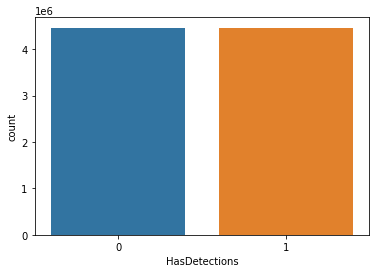

In [11]:
Bar_Pred = sns.countplot(x='HasDetections',data=df)
plt.show()

# Distributions quite equiatable

del Bar_Pred

## EDA of categorical columns

In [12]:
def get_top_features_for_category(col,label):
    
    temp_df1 = df[df['HasDetections']==label]
    temp_df1[col] = temp_df1[col].astype('str')
    
    temp_df2 = df[[col,'HasDetections']]
    temp_df2[col] = temp_df2[col].astype('str')
    
    index_list = temp_df1[col].value_counts(ascending=False)[:5].index.to_list()
    
    temp_df2.loc[temp_df2[(~temp_df2[col].isin(index_list))].index, col] = "Others"
    
    tmp = pd.crosstab(temp_df2[col], temp_df2['HasDetections'])
    
    tmp['Total'] = tmp[0] + tmp[1]
    tmp.drop(columns=[0,1],inplace=True)
    
    sum_column = tmp['Total'].sum()
    
    tmp['Total'] = tmp['Total'].apply(lambda x:(x/sum_column)*100)
    tmp = tmp.reset_index()
   
    
    del temp_df1
    
    return temp_df2,tmp
    
    

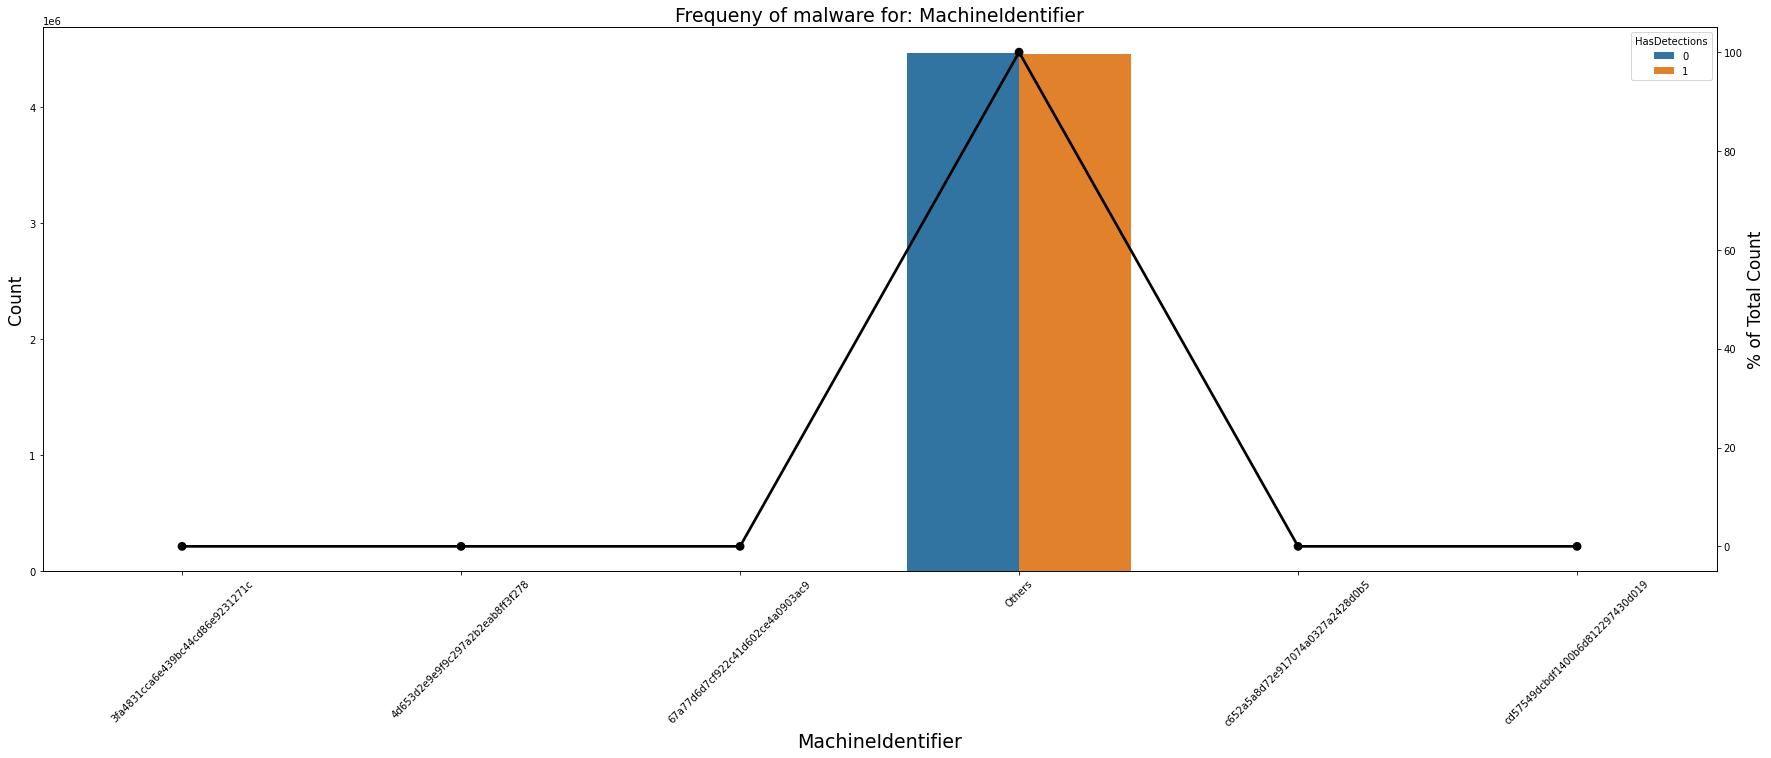

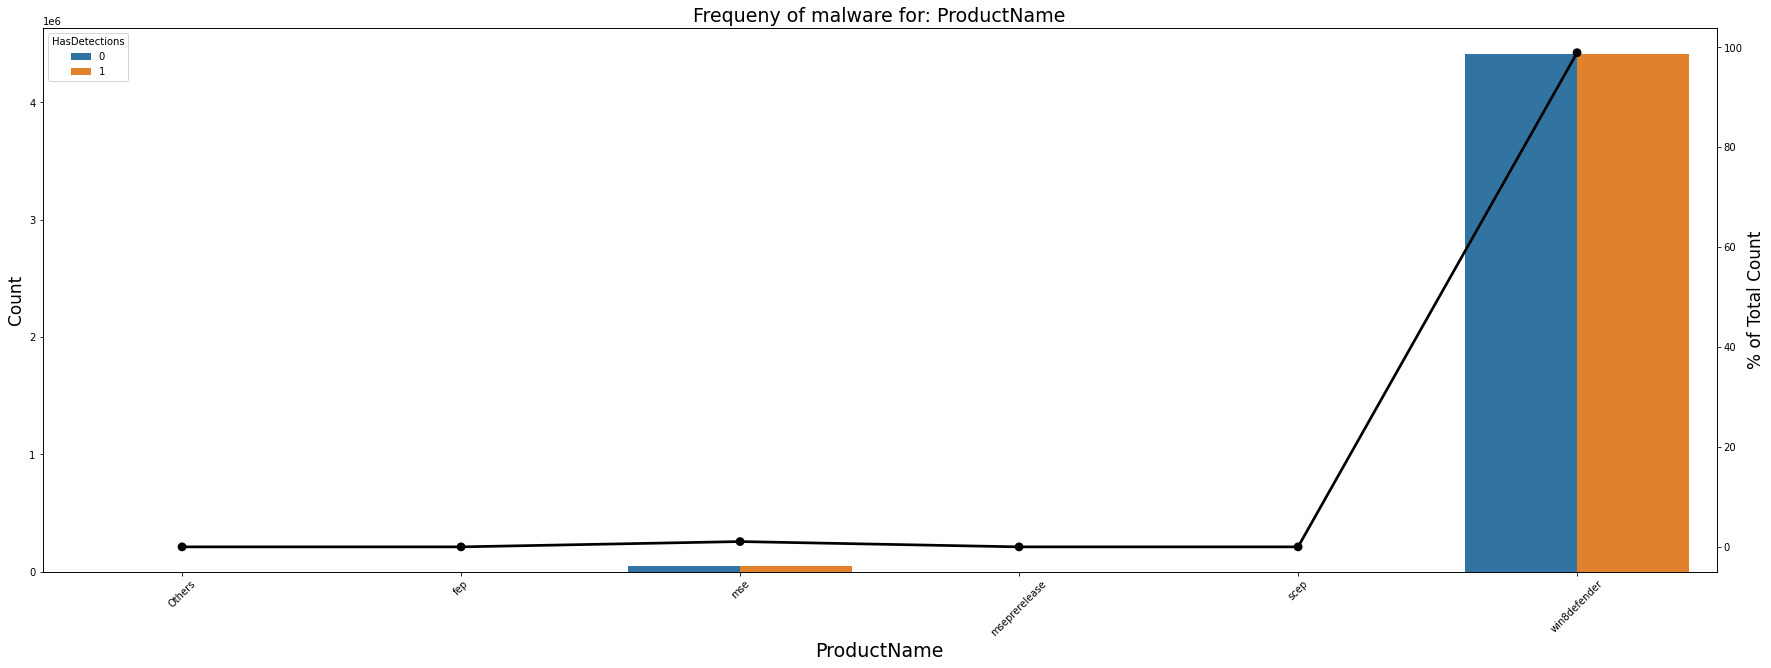

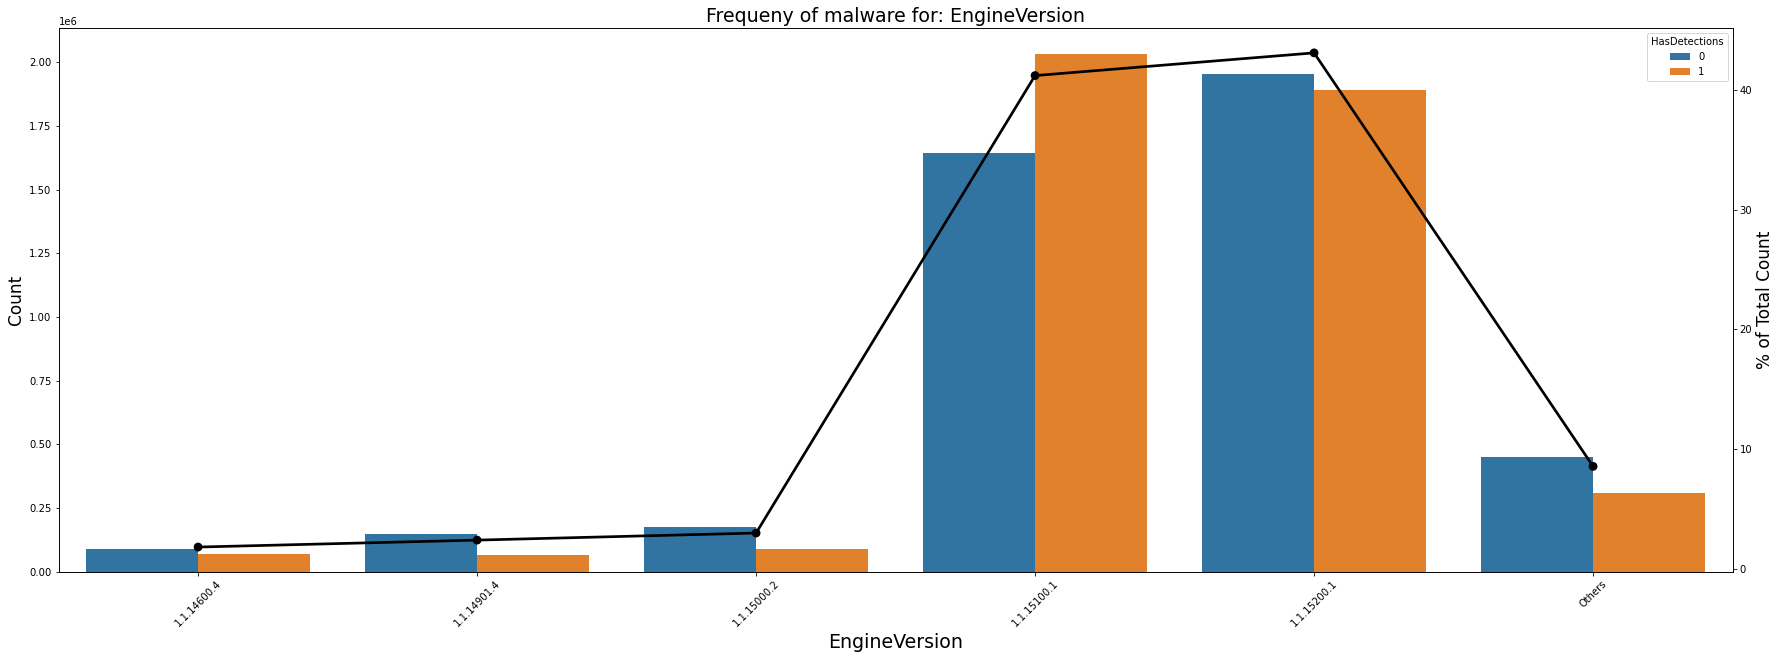

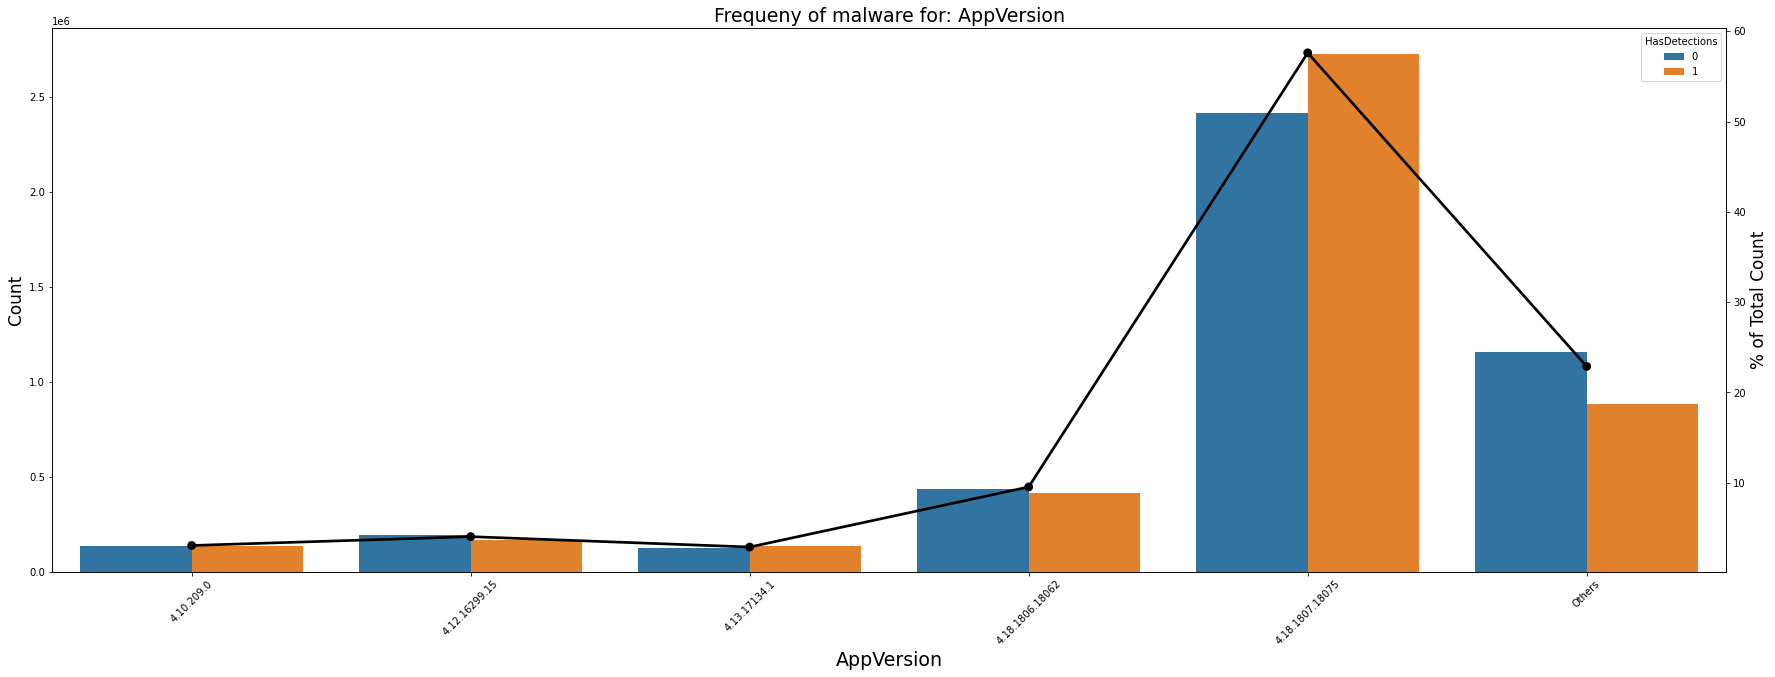

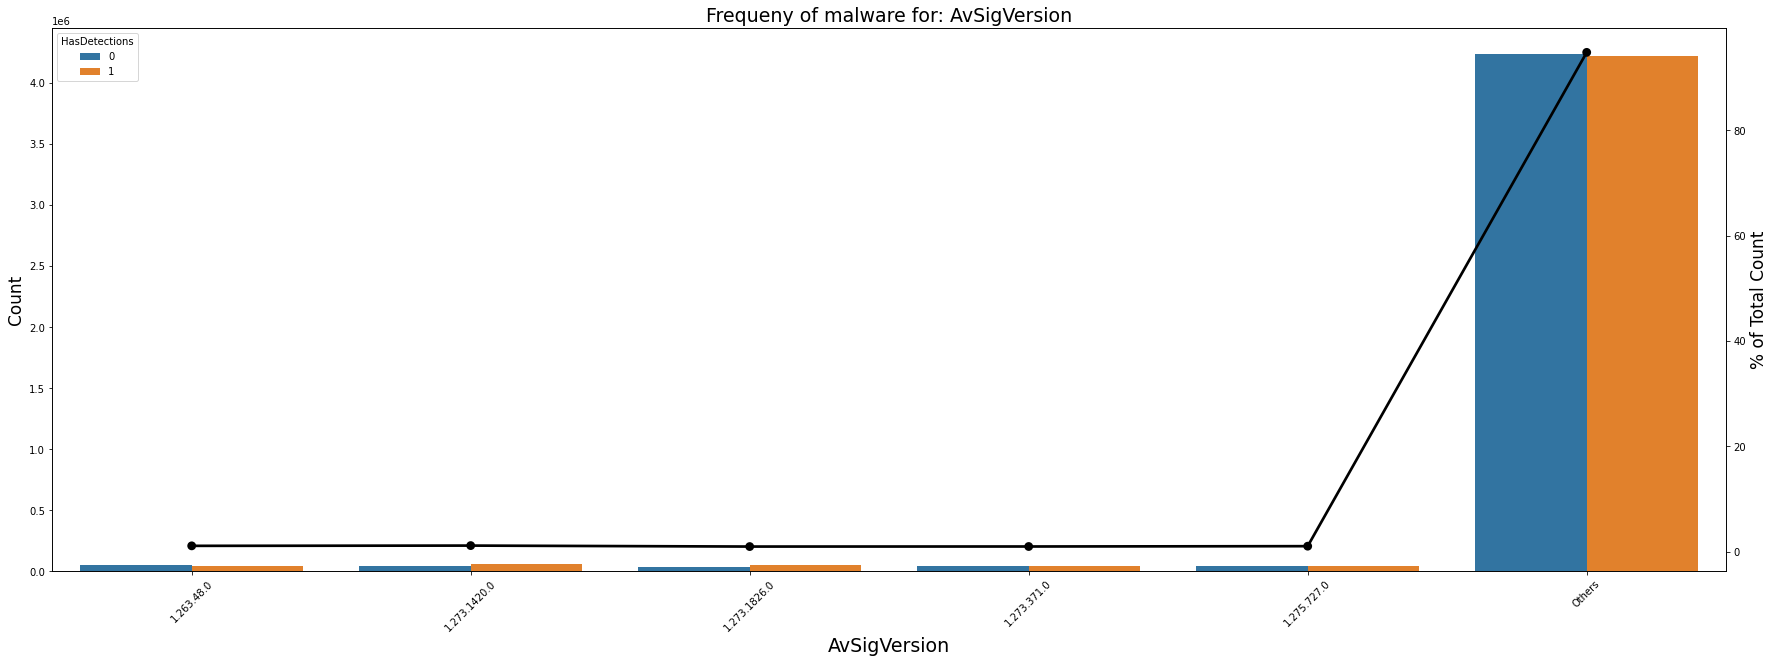

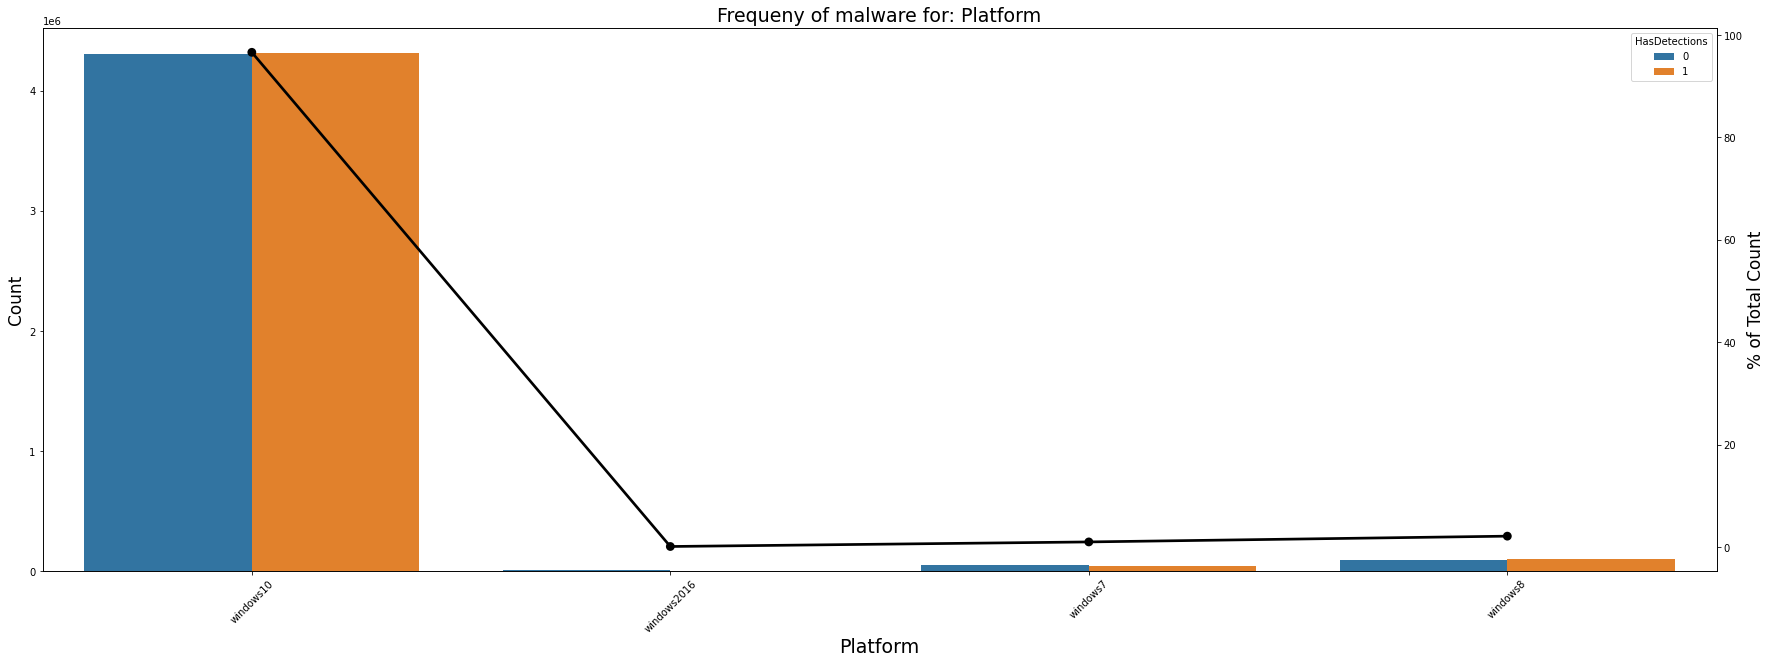

In [13]:
columns = ['MachineIdentifier','ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion','Platform']

for column in columns:
    
    bar_df,line_df = get_top_features_for_category(column,1)
    
    plt.figure(figsize=(30,10))
    
    Bar_Plot = sns.countplot(x=column,hue='HasDetections',data=bar_df,order=line_df[column].tolist())
    Line_Plot = Bar_Plot.twinx()
    Line_Plot = sns.pointplot(x=column, y='Total', data=line_df, color='black', order=line_df[column].tolist(), legend=False)
    
    Bar_Plot.set_title("Frequeny of malware for: " + str(column), fontsize=19)
    
    Bar_Plot.set_xticklabels(Bar_Plot.get_xticklabels(),rotation=45)
    Bar_Plot.set_xlabel(column, fontsize=19)
    Bar_Plot.set_ylabel("Count", fontsize=17)
    Line_Plot.set_ylabel("% of Total Count", fontsize=17)
    
    plt.show()
    
    del Bar_Plot,Line_Plot, bar_df,line_df
    
del columns

- Inference

```
1. With respect to the product name win8defender has a higher malware but also many users too use this software
2. Engine version 11.15100.1 has a high malware count despite having a share of only 40 percent in the data
3. Windows 10 is the most commonly used. With respect to windows8 having a low share among the total data similar to windows 7, it has a high malware count. This is an interesting observation.
```

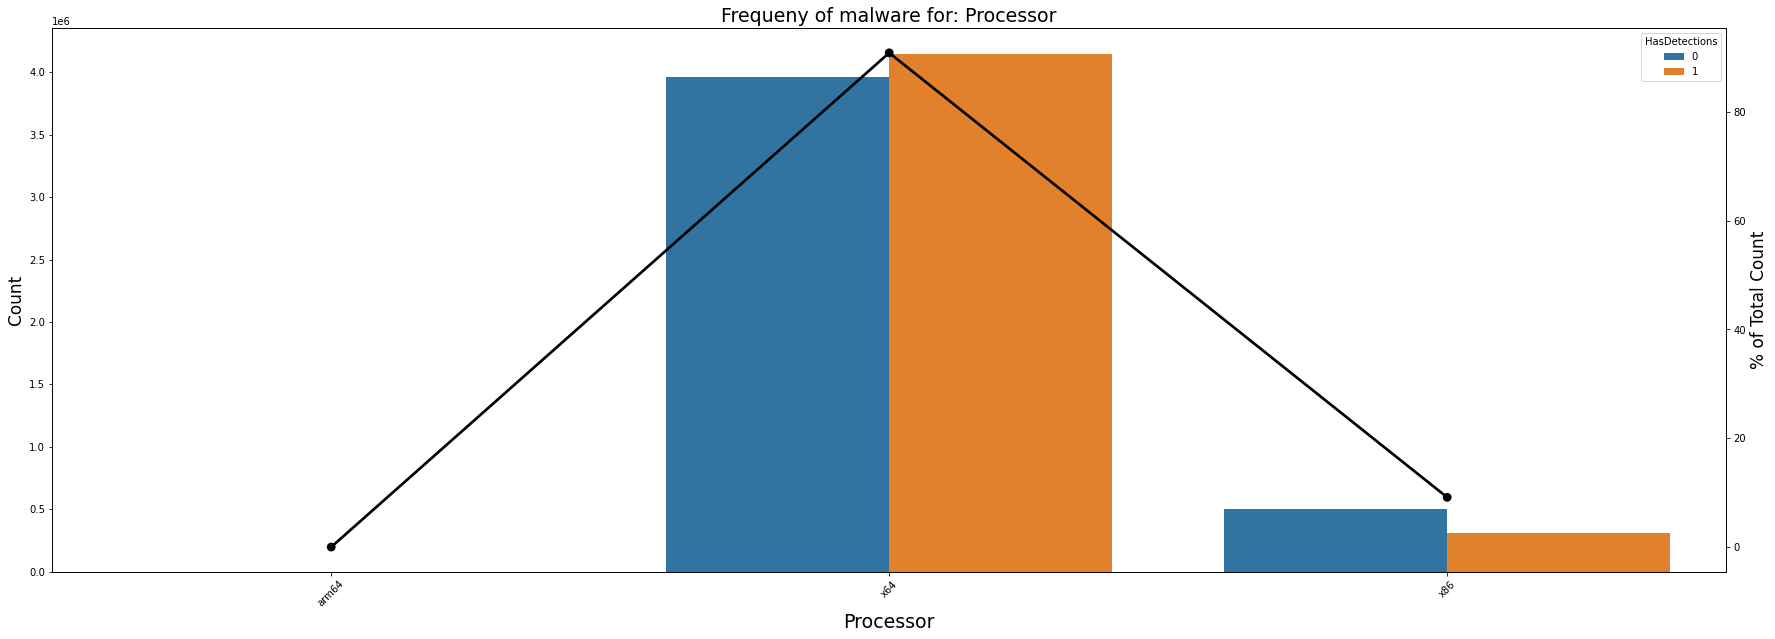

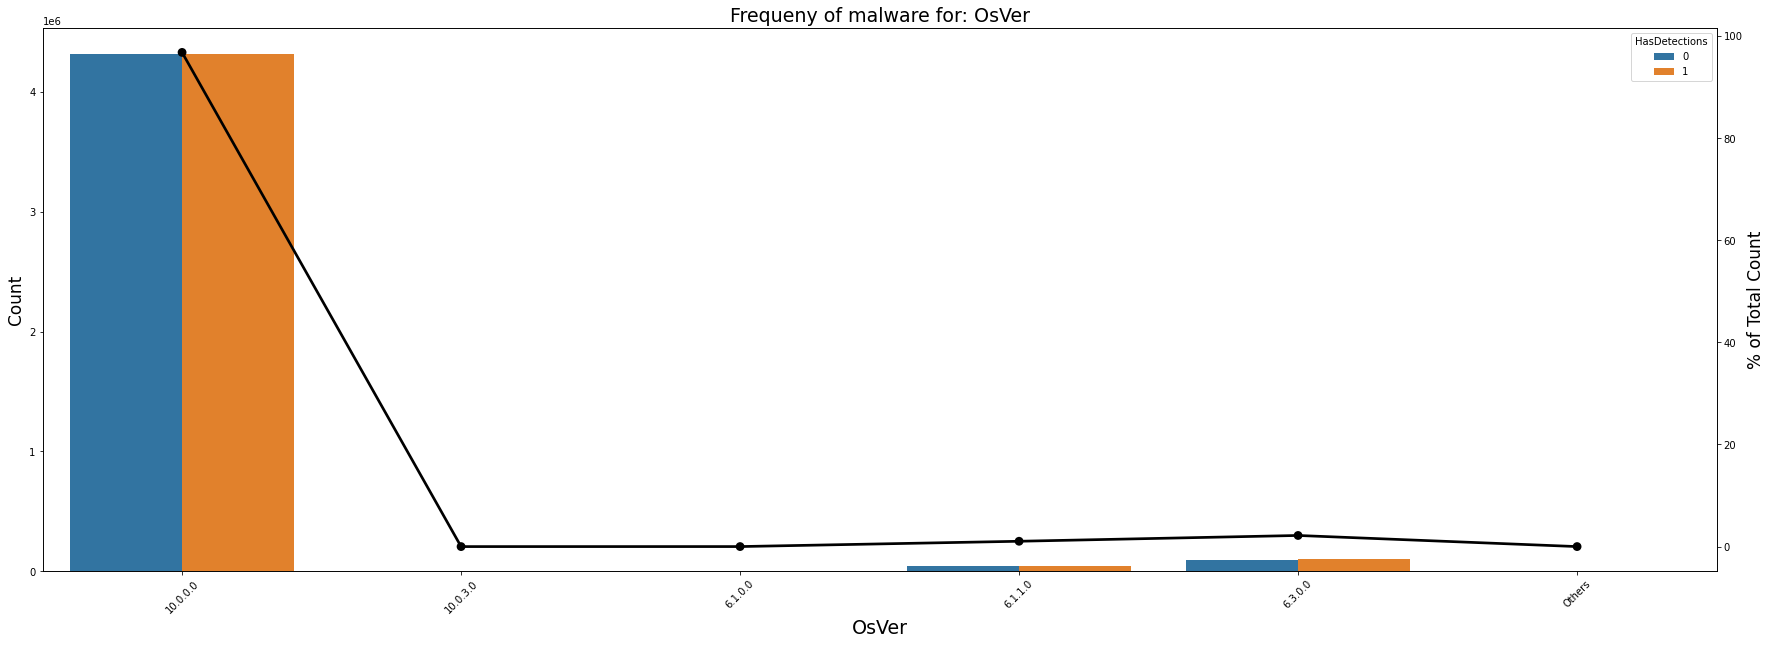

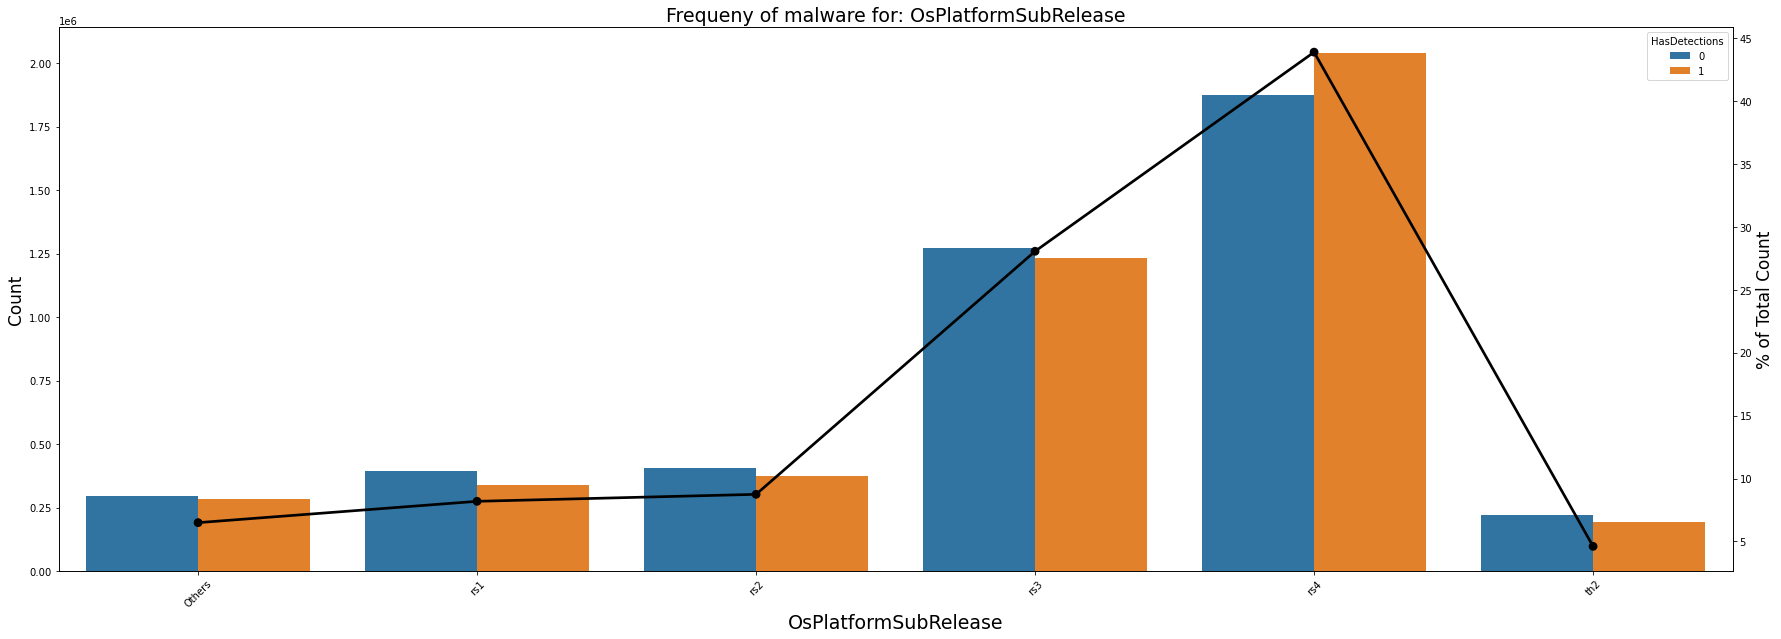

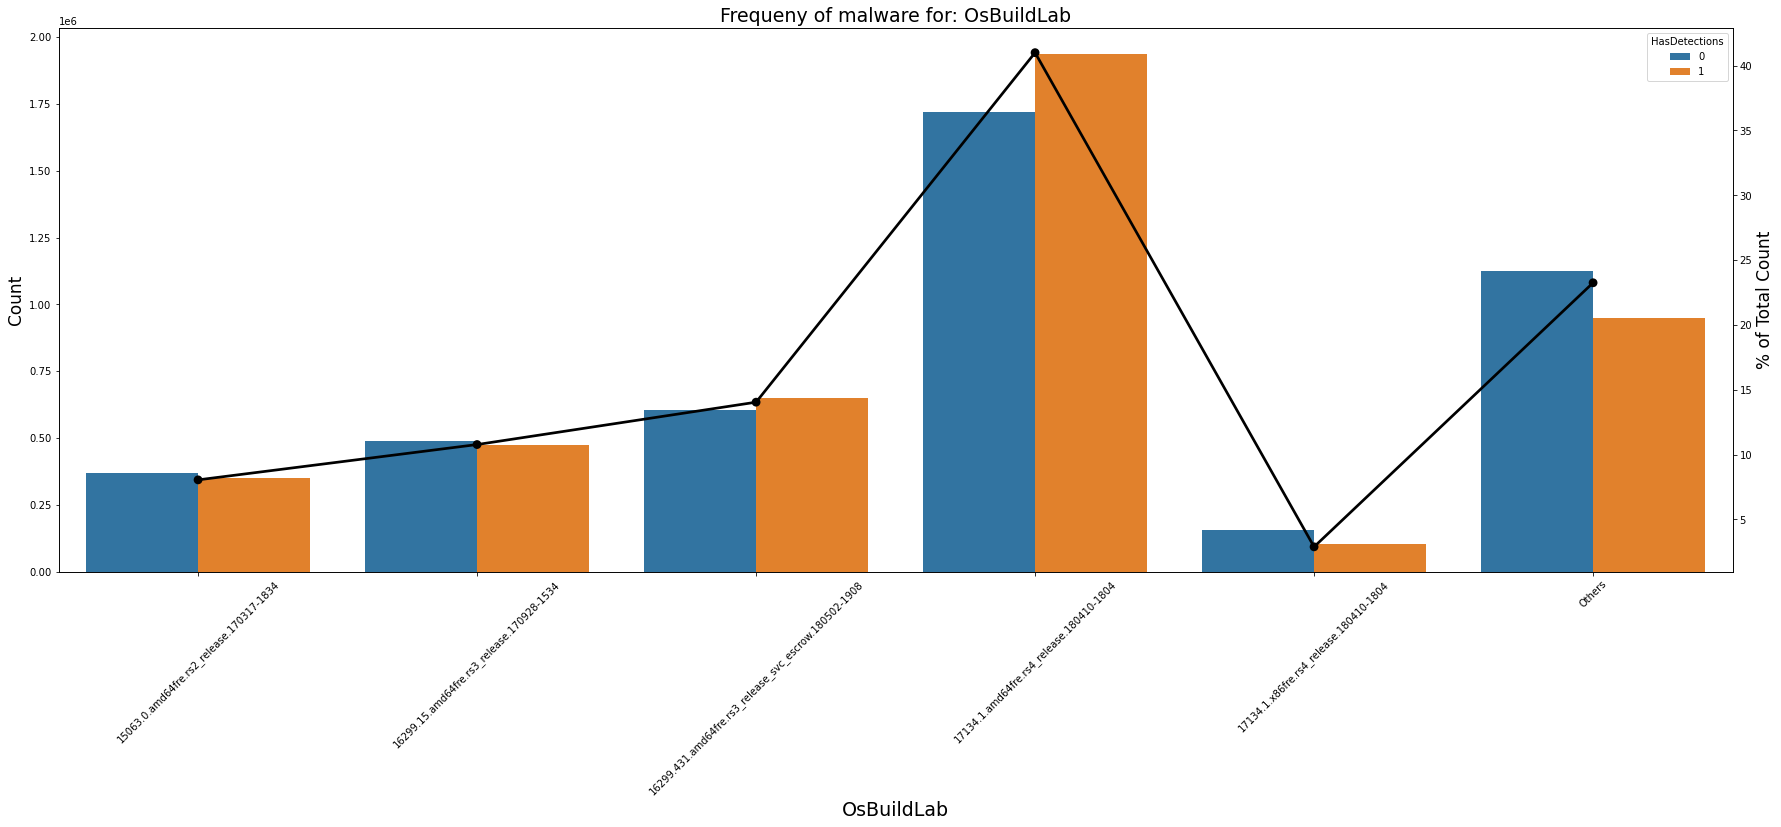

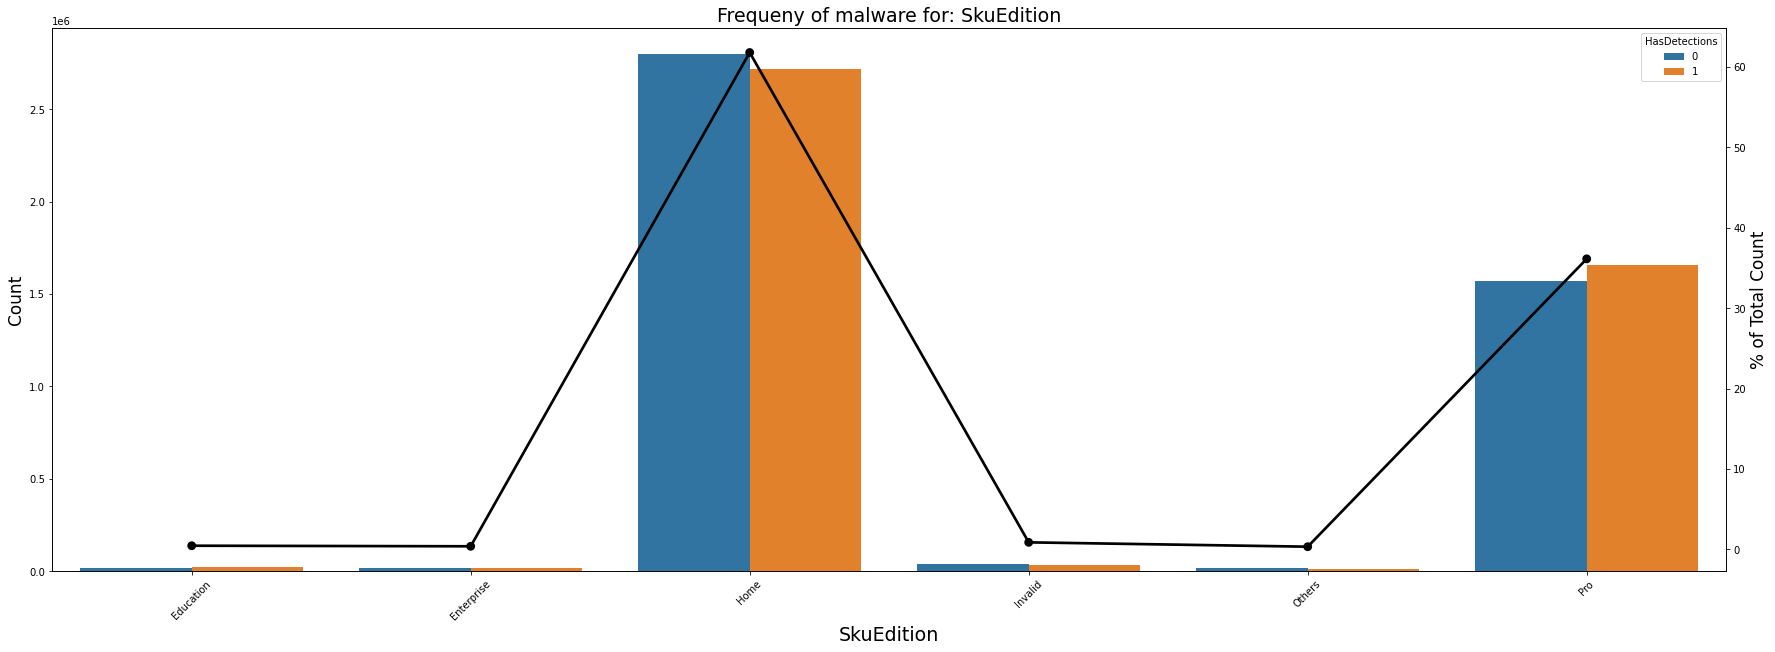

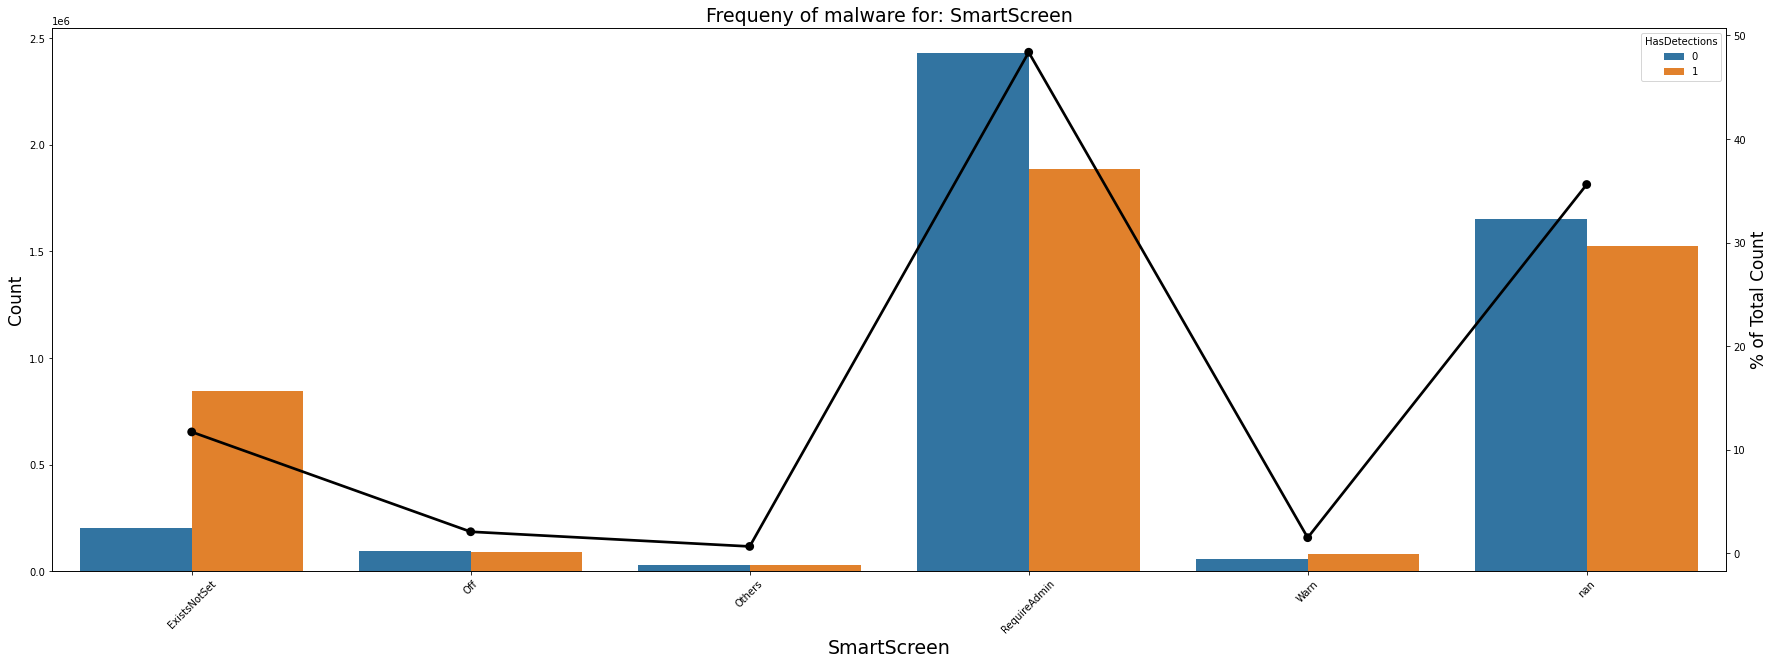

In [14]:
columns = ['Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen']

for column in columns:
    
    bar_df,line_df = get_top_features_for_category(column,1)
    
    plt.figure(figsize=(30,10))
    
    Bar_Plot = sns.countplot(x=column,hue='HasDetections',data=bar_df,order=line_df[column].tolist())
    Line_Plot = Bar_Plot.twinx()
    Line_Plot = sns.pointplot(x=column, y='Total', data=line_df, color='black', order=line_df[column].tolist(), legend=False)
    
    Bar_Plot.set_title("Frequeny of malware for: " + str(column), fontsize=19)
    
    Bar_Plot.set_xticklabels(Bar_Plot.get_xticklabels(),rotation=45)
    Bar_Plot.set_xlabel(column, fontsize=19)
    Bar_Plot.set_ylabel("Count", fontsize=17)
    Line_Plot.set_ylabel("% of Total Count", fontsize=17)
    
    plt.show()
    
    del Bar_Plot,Line_Plot, bar_df,line_df
    
del columns

- Inference

```
1. OsVer 6.3.0.0 has a higher malware despite sharing only a small percentage of the data set
2. Processor x64 has a high malware count 
2. OsPlatformSubRelease rs4 has a high malware count
3. Systems without SmartScreen seemed to very susciptible to malware. Also enabling only a warn feature seemed to make system suspectible
```

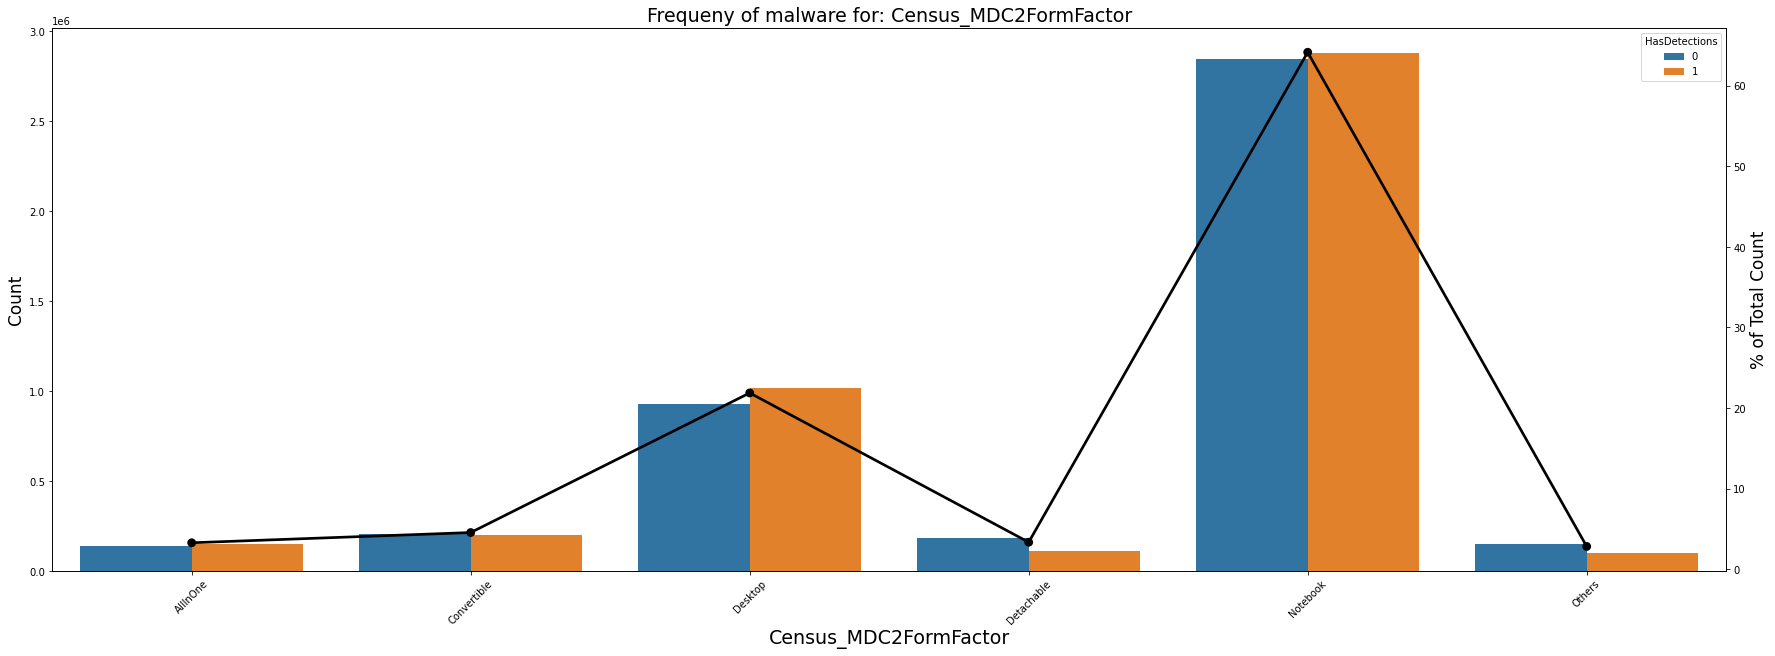

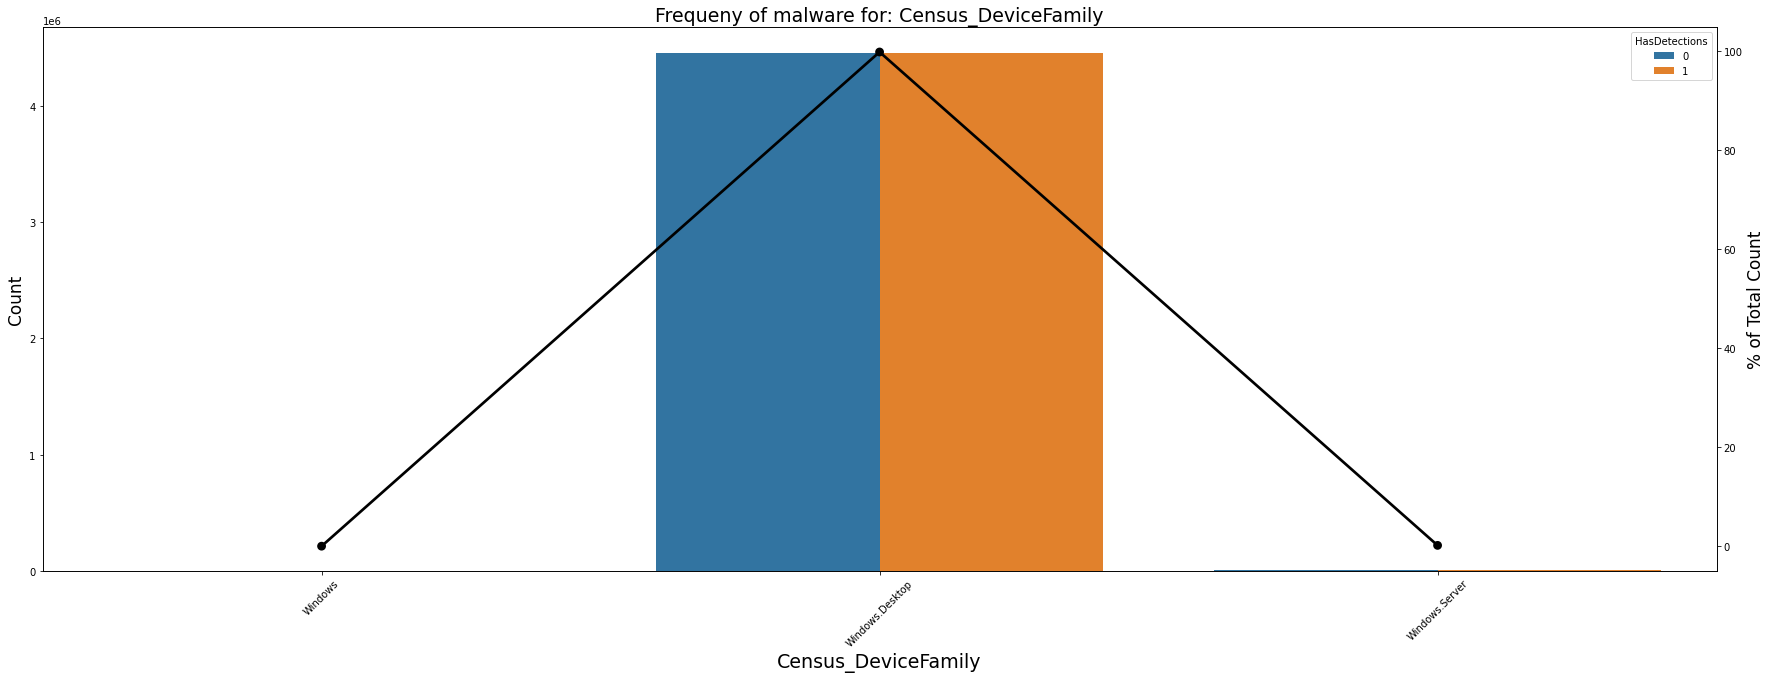

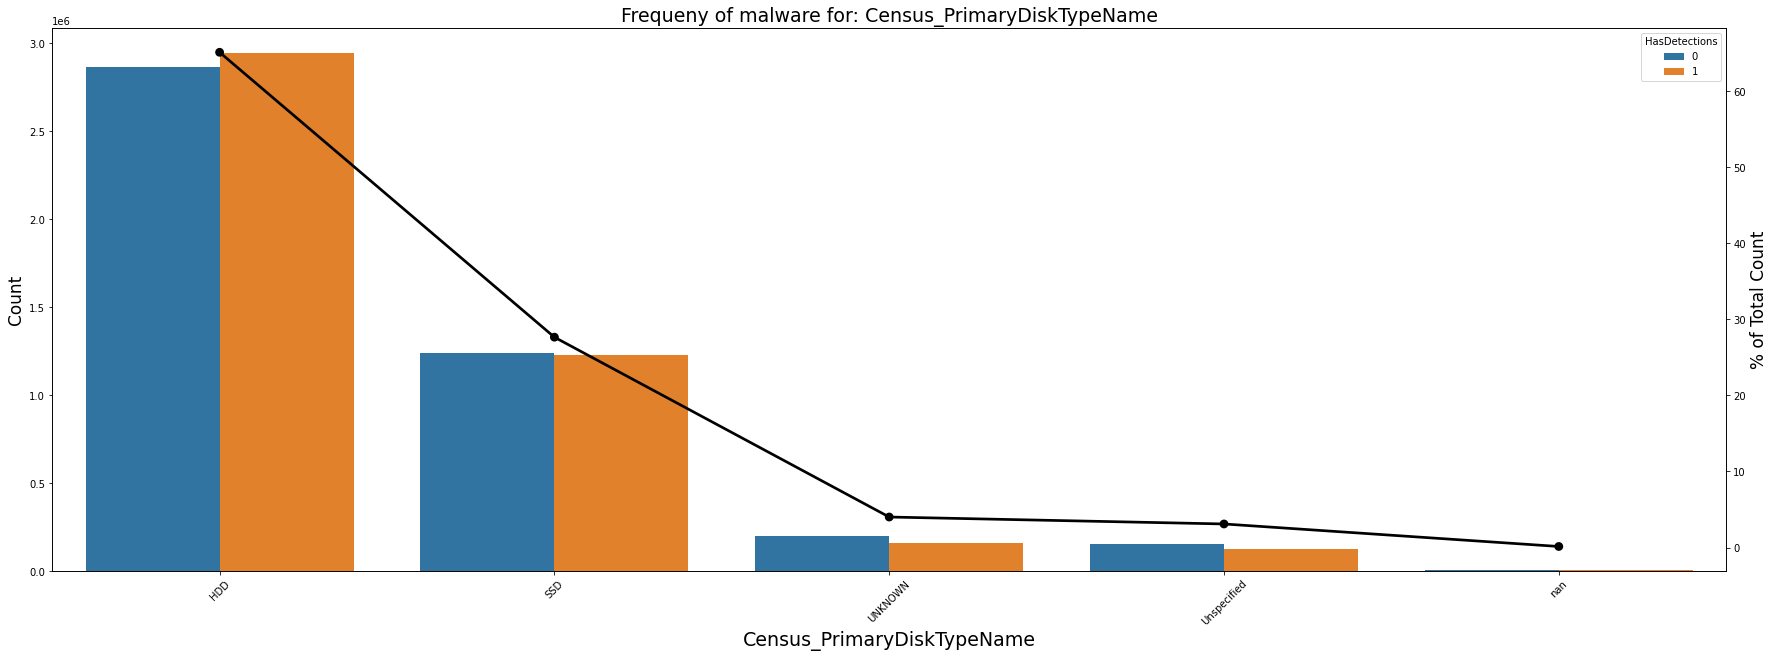

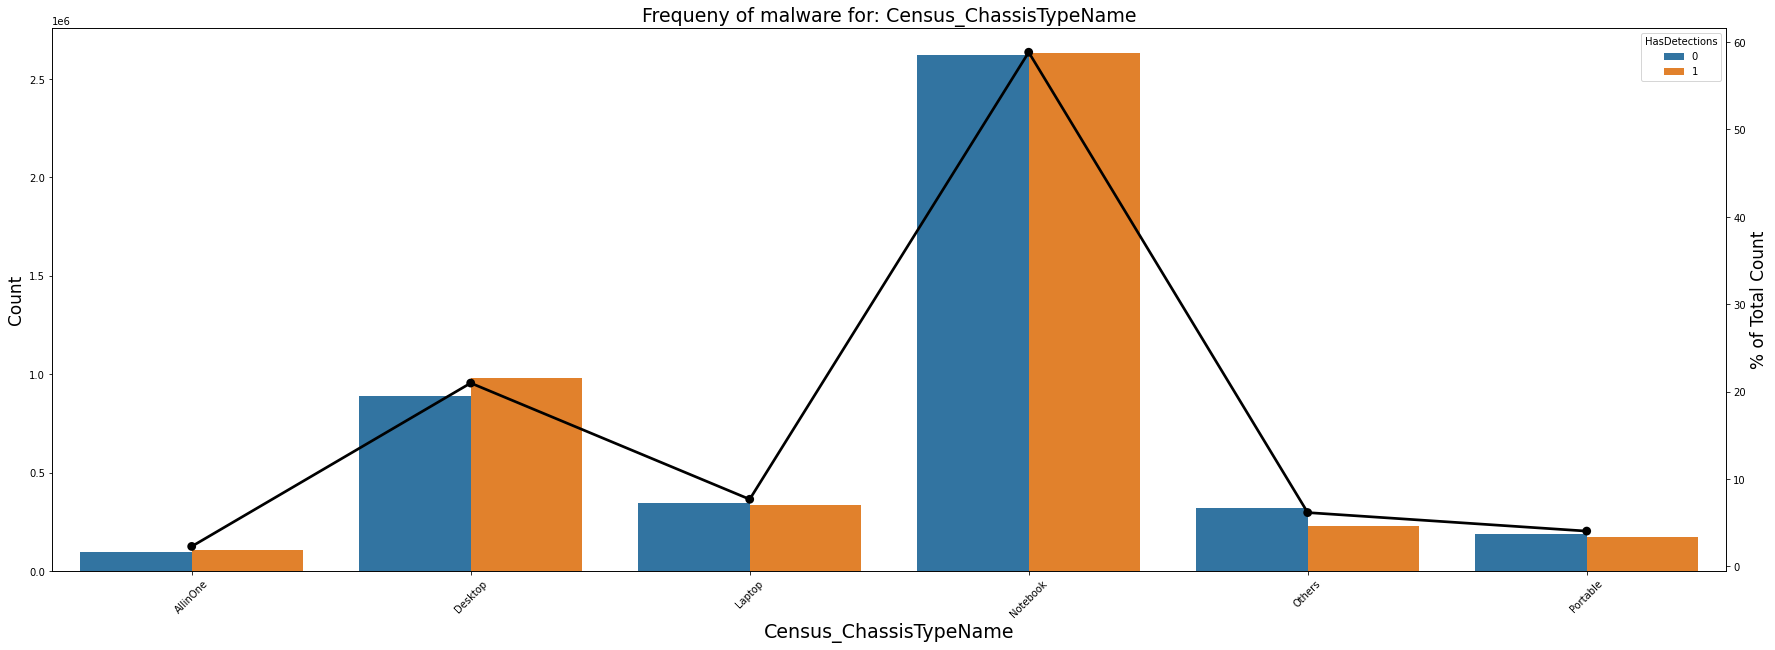

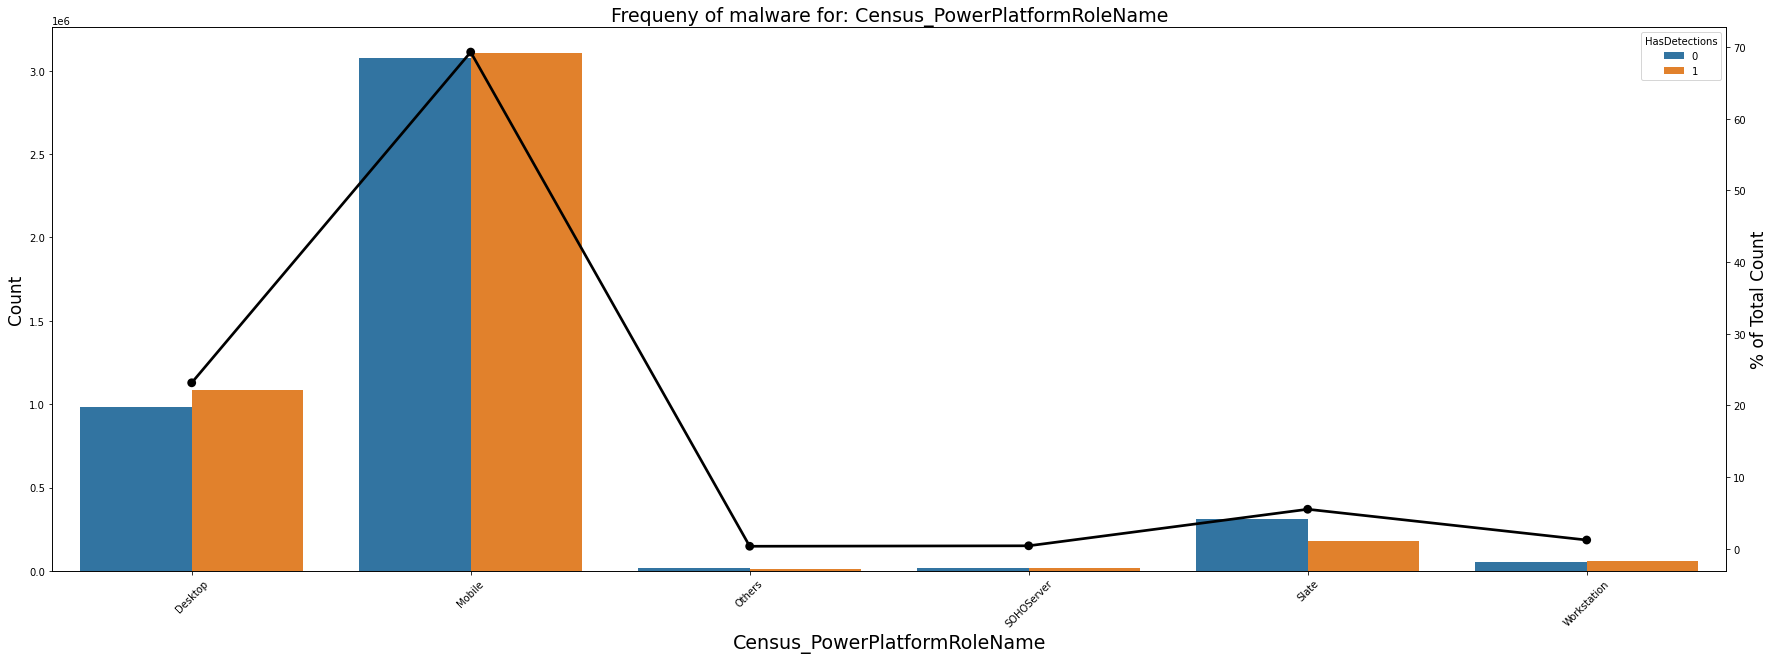

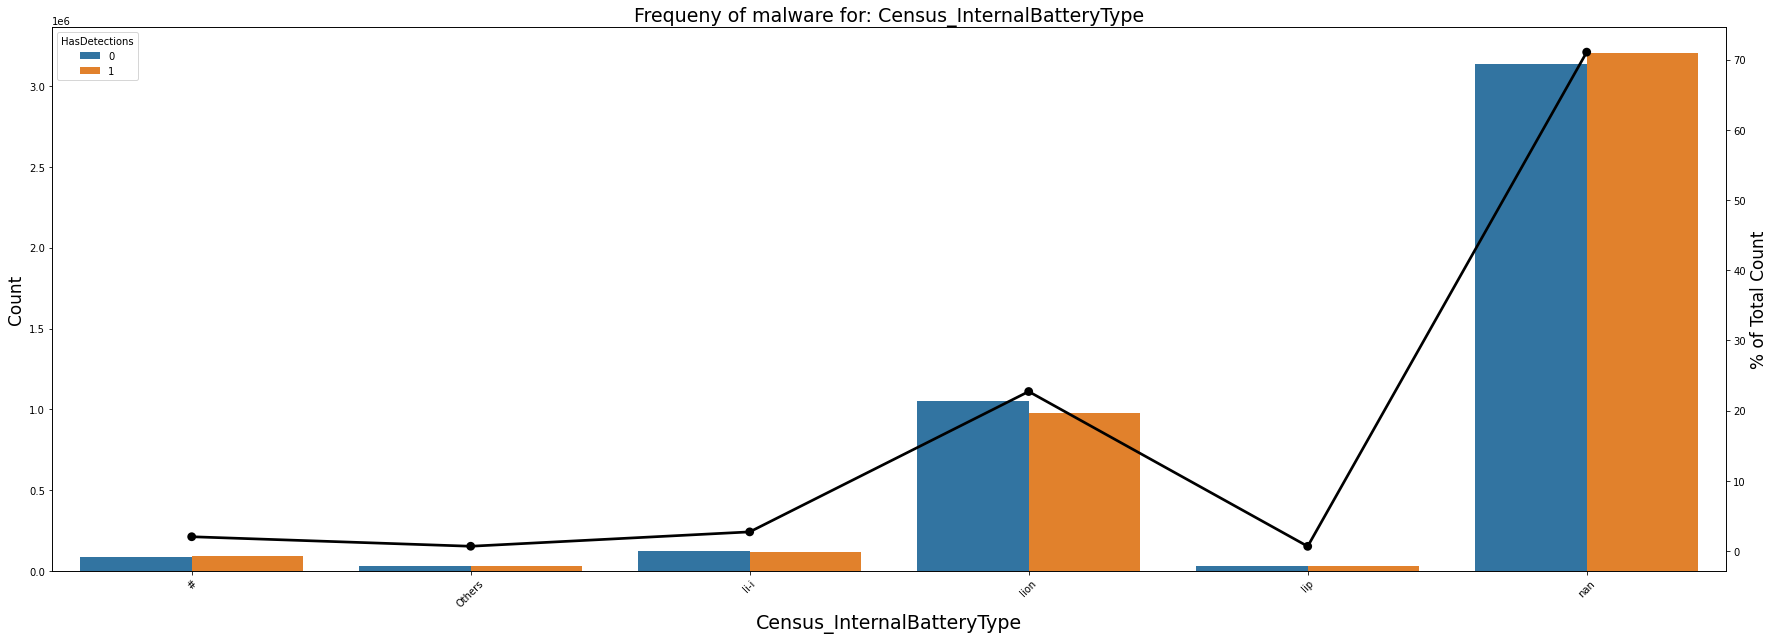

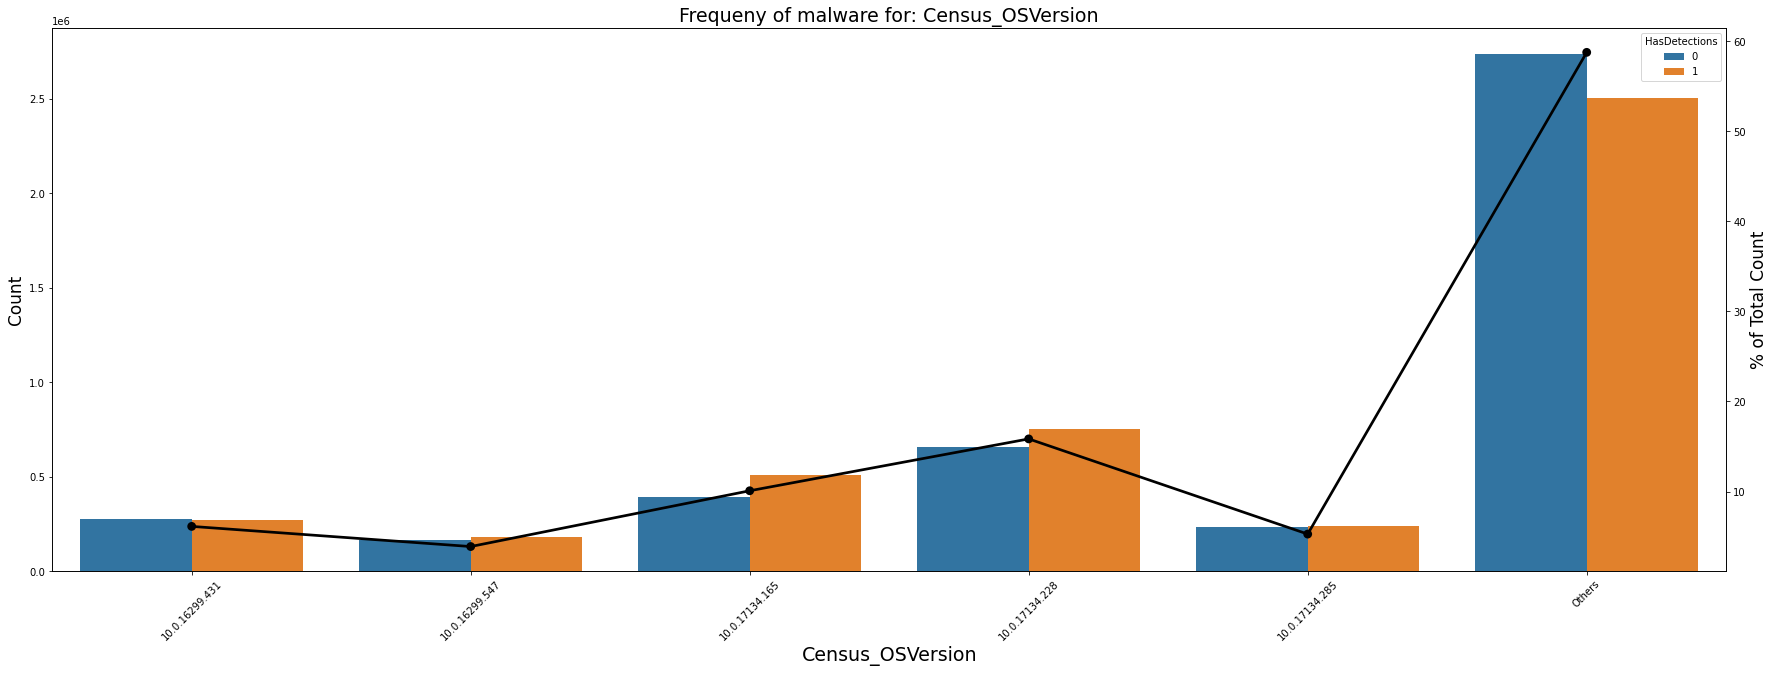

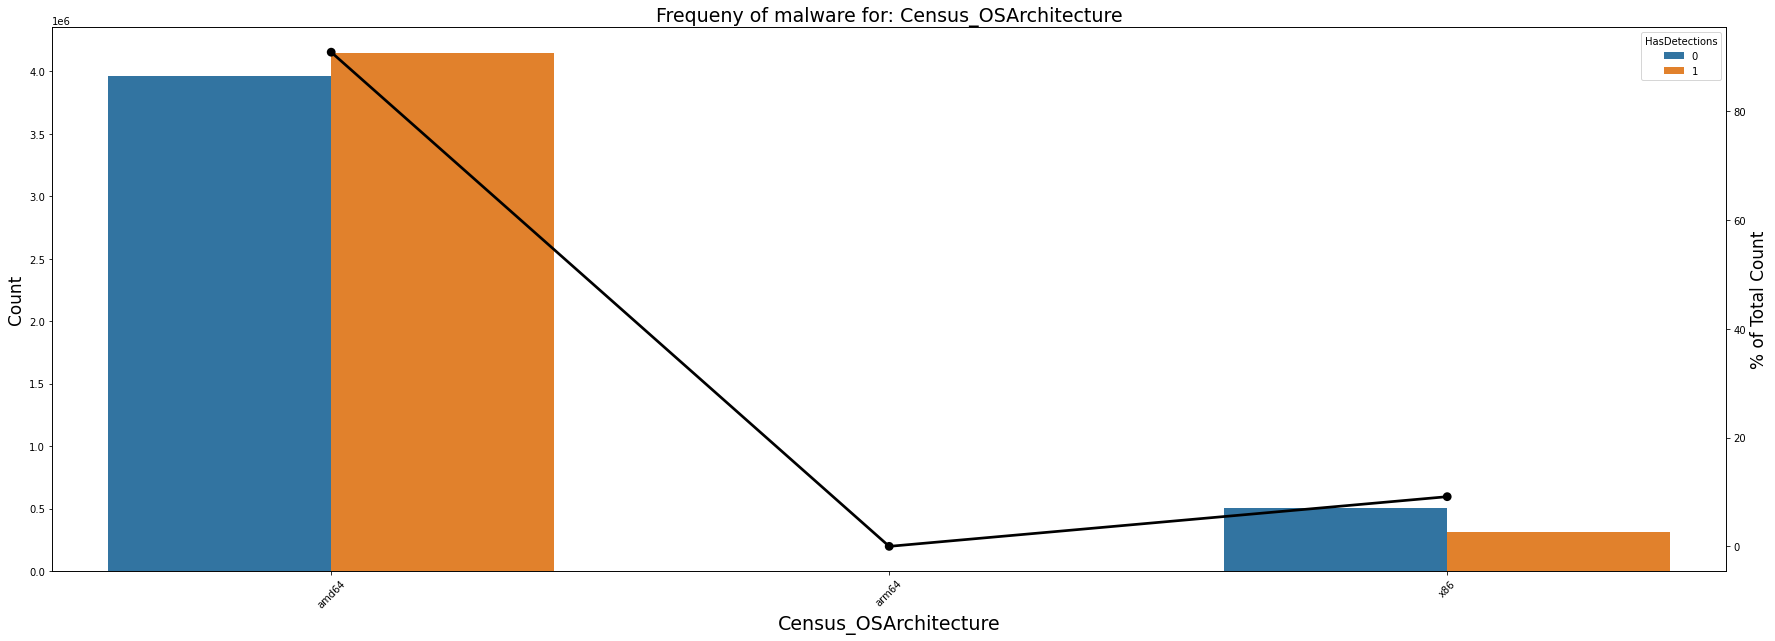

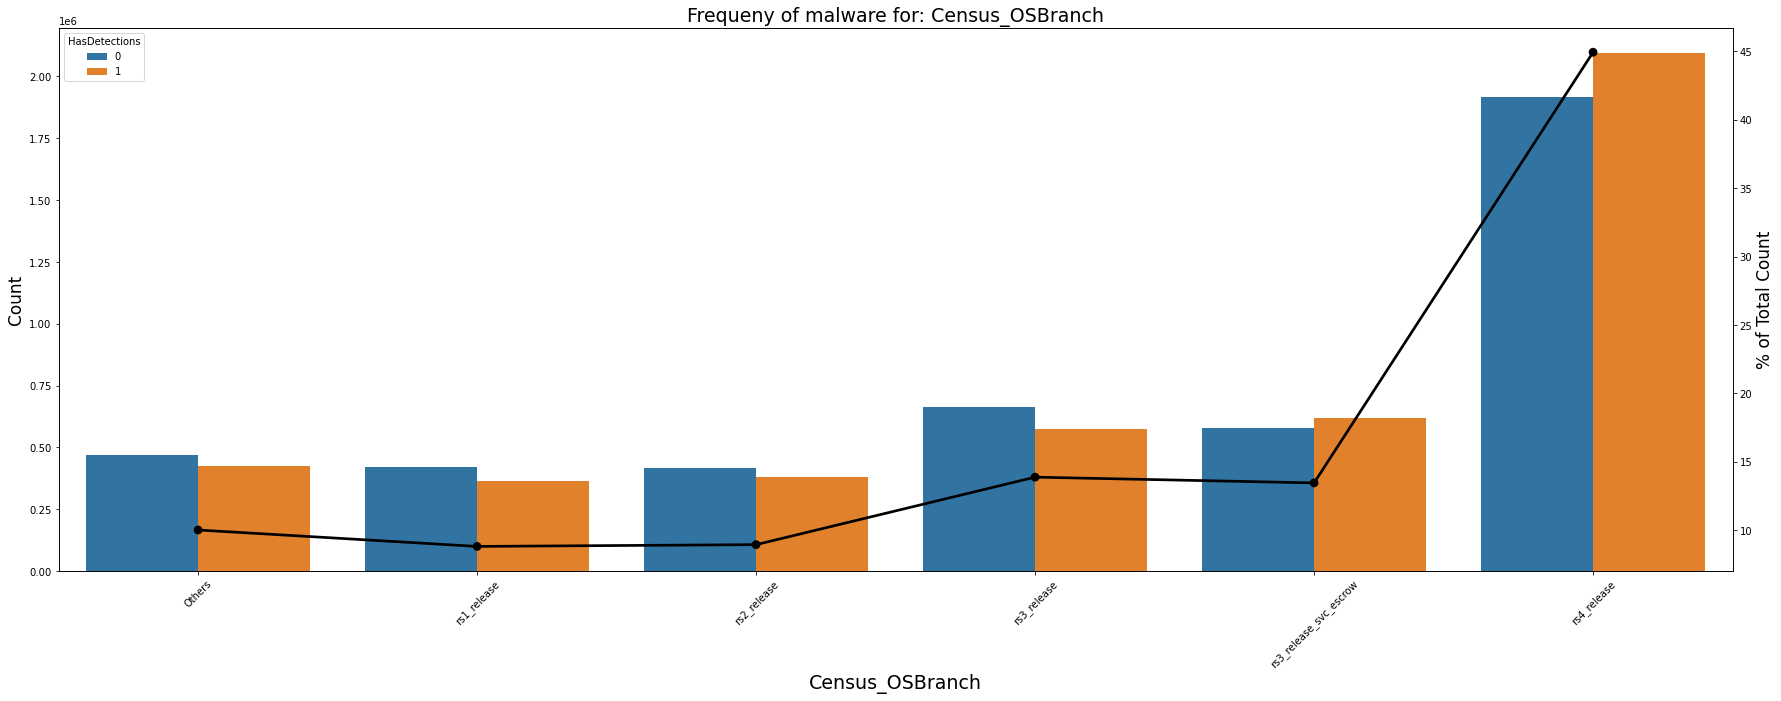

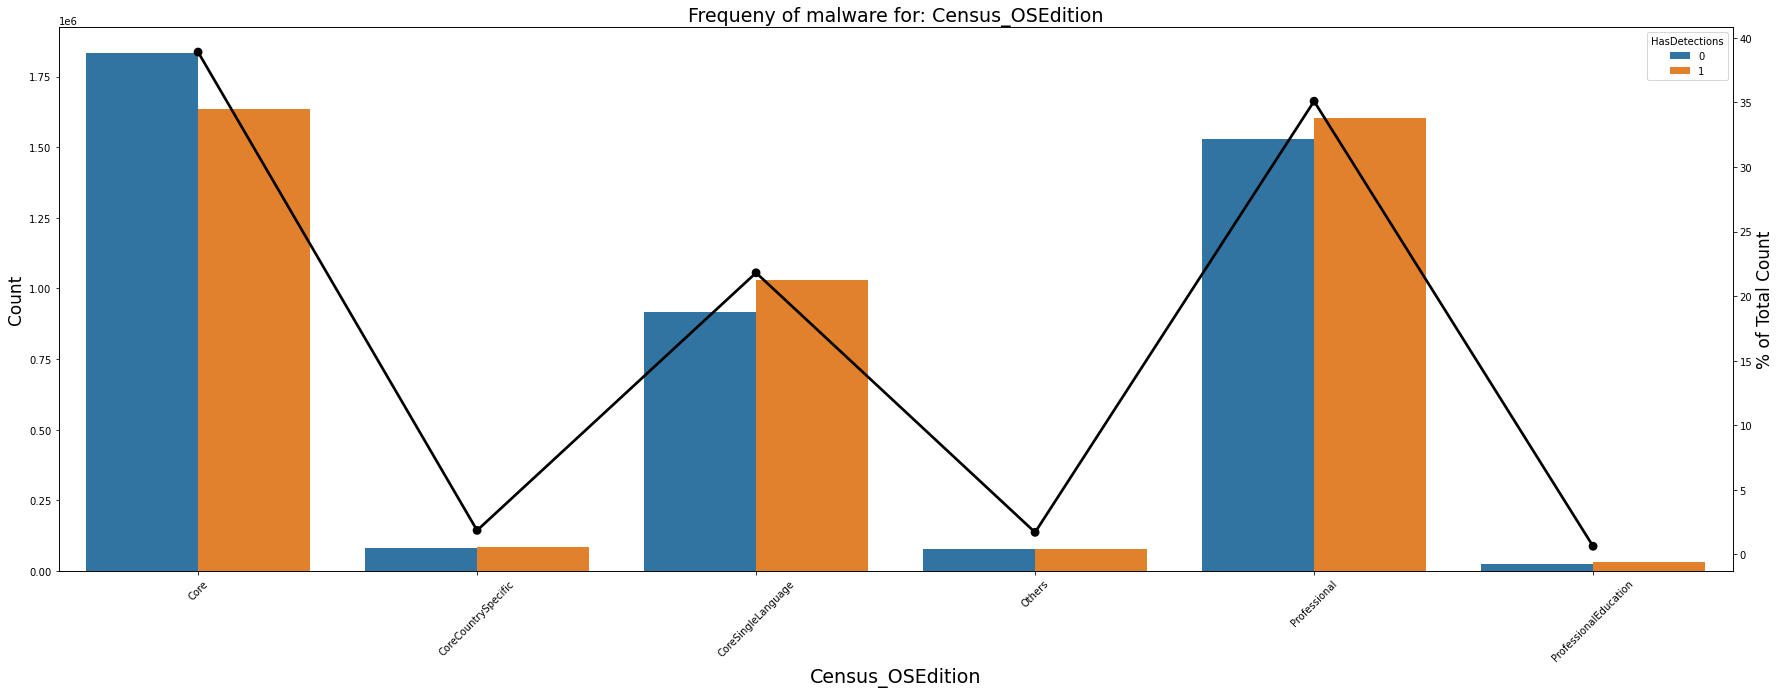

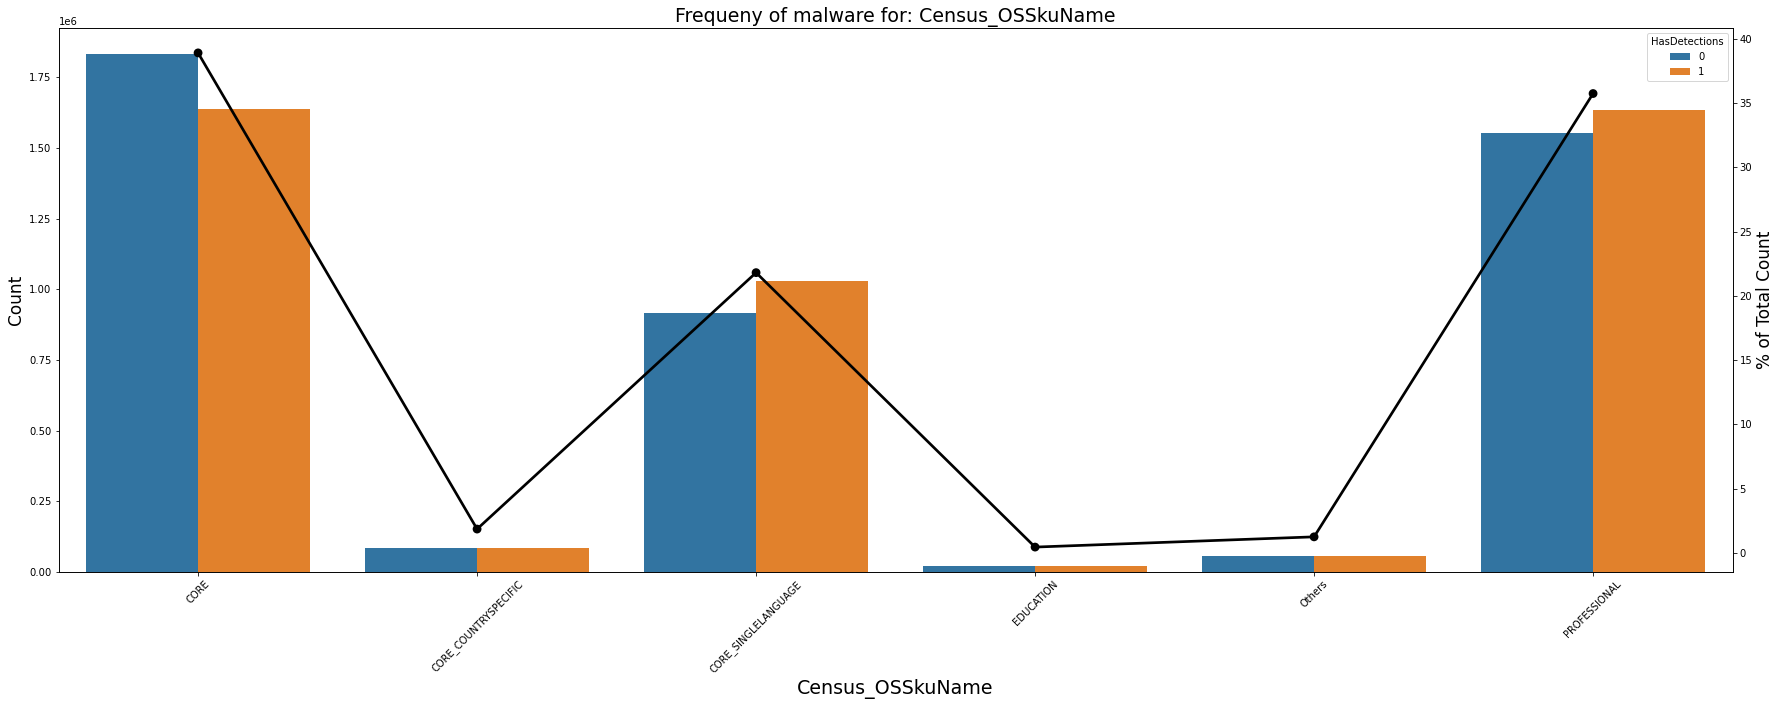

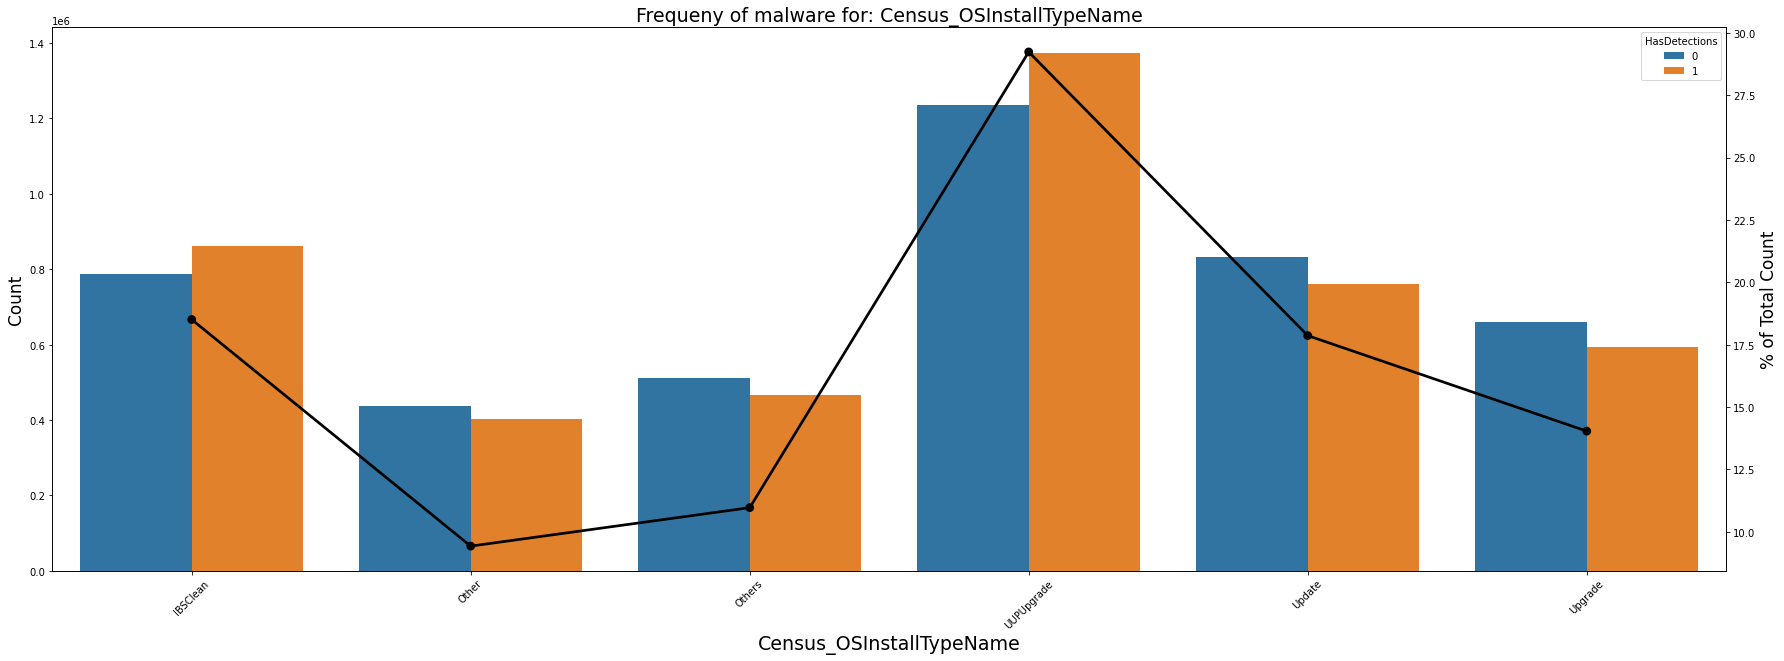

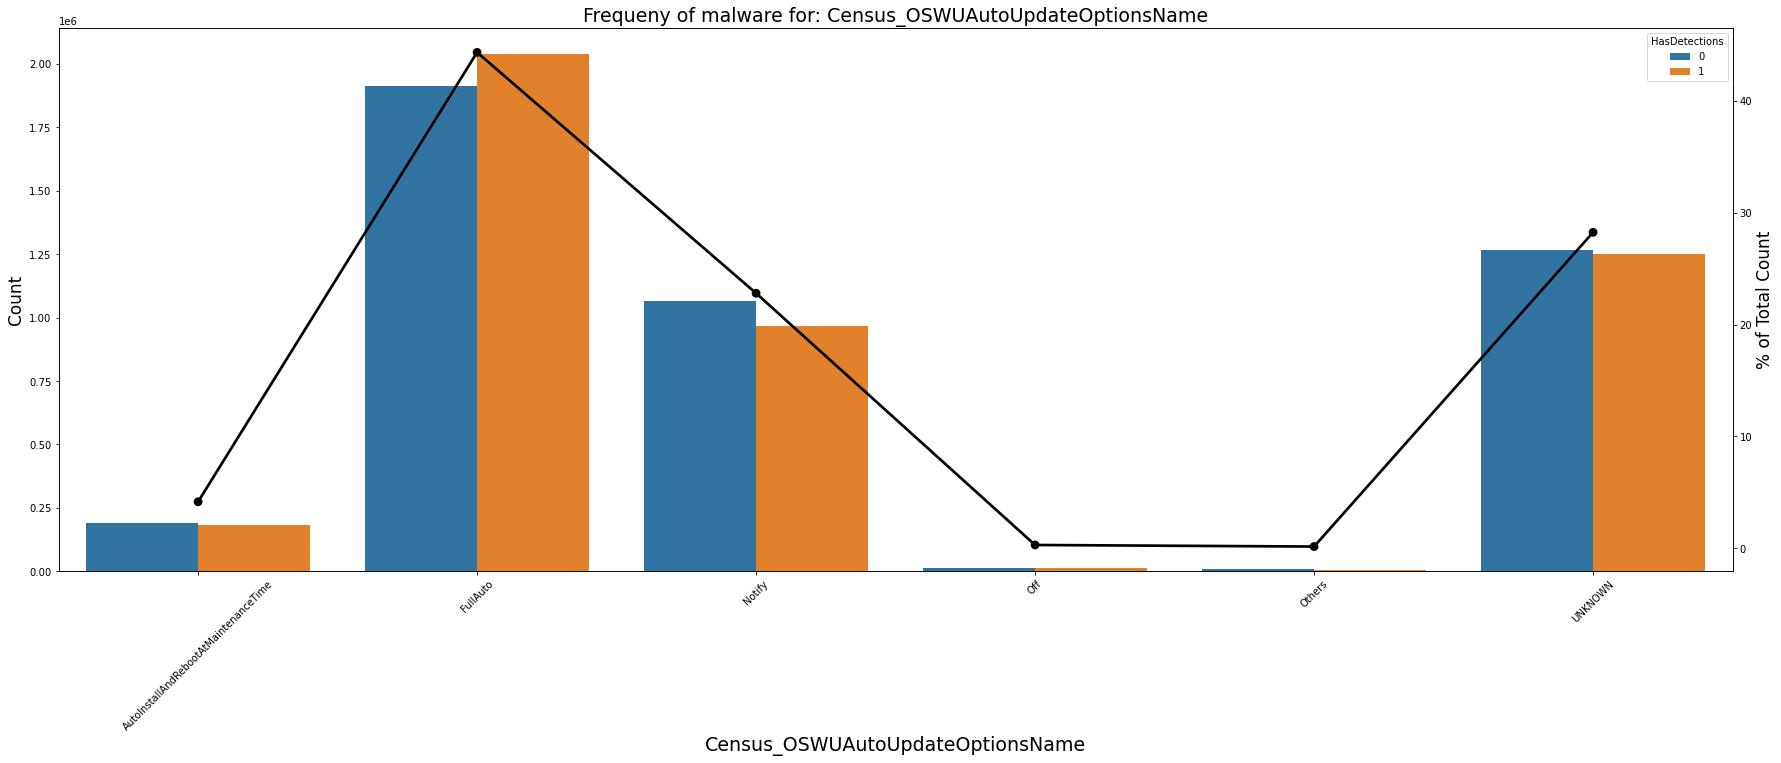

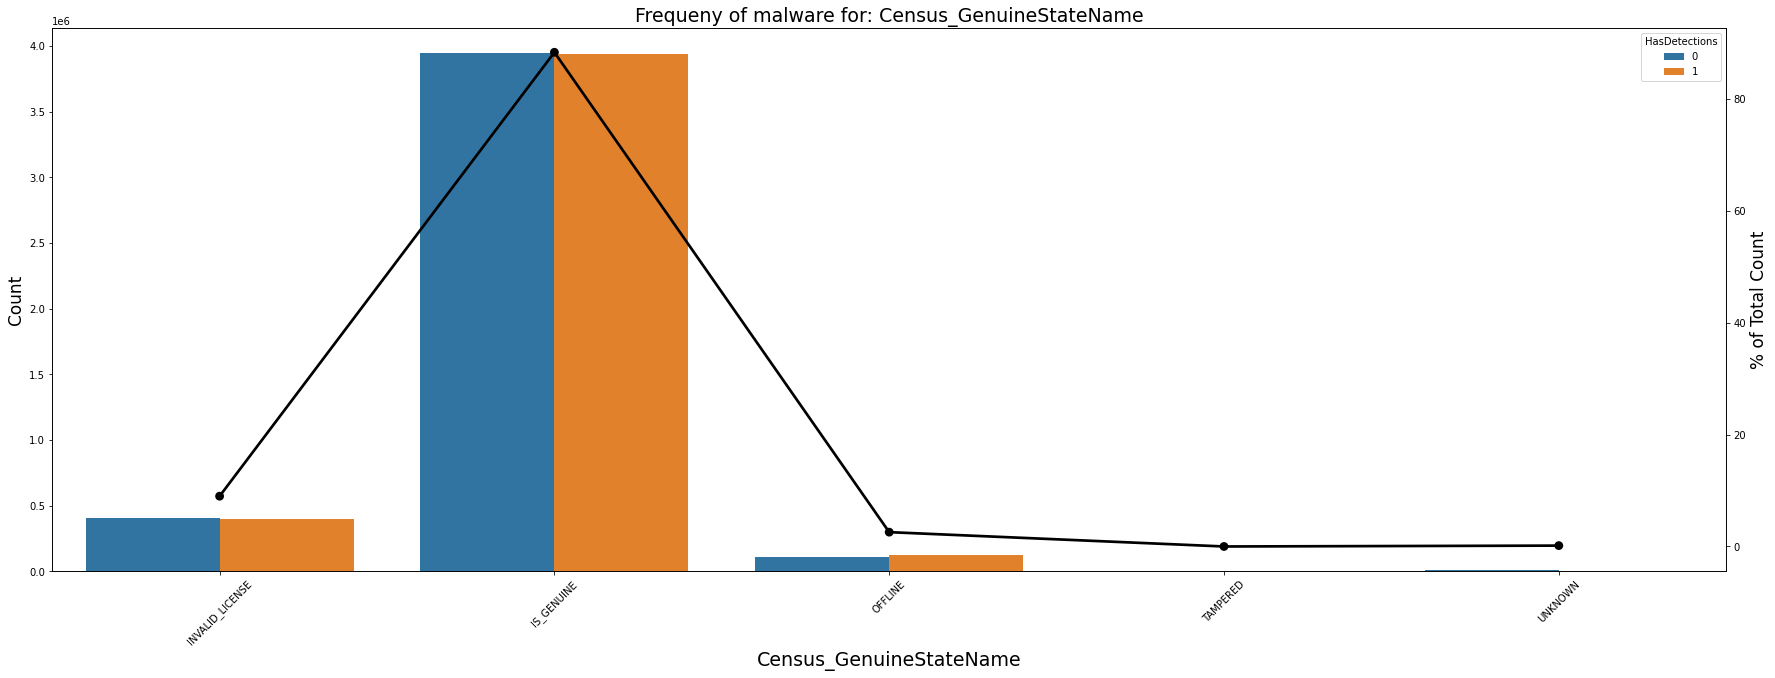

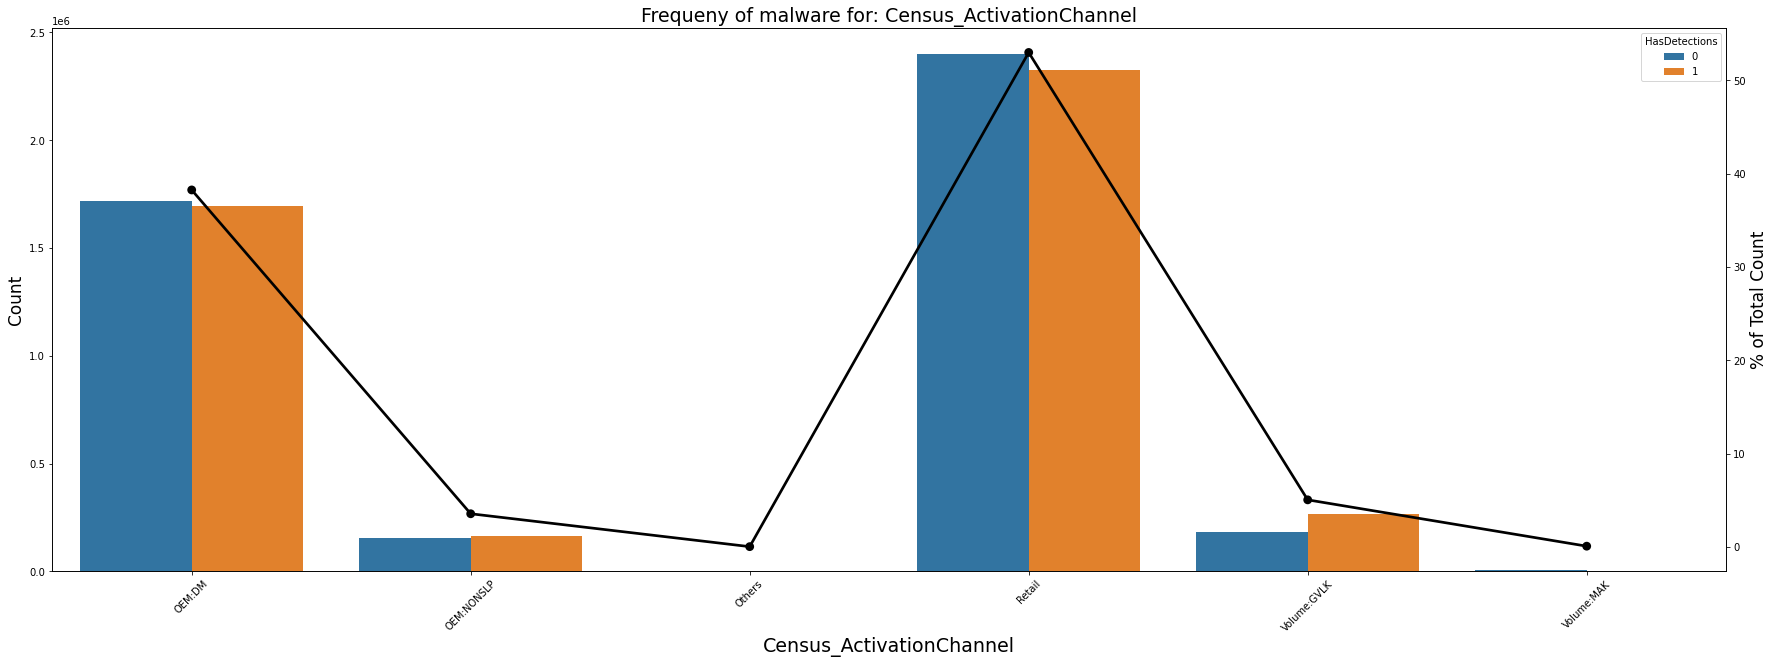

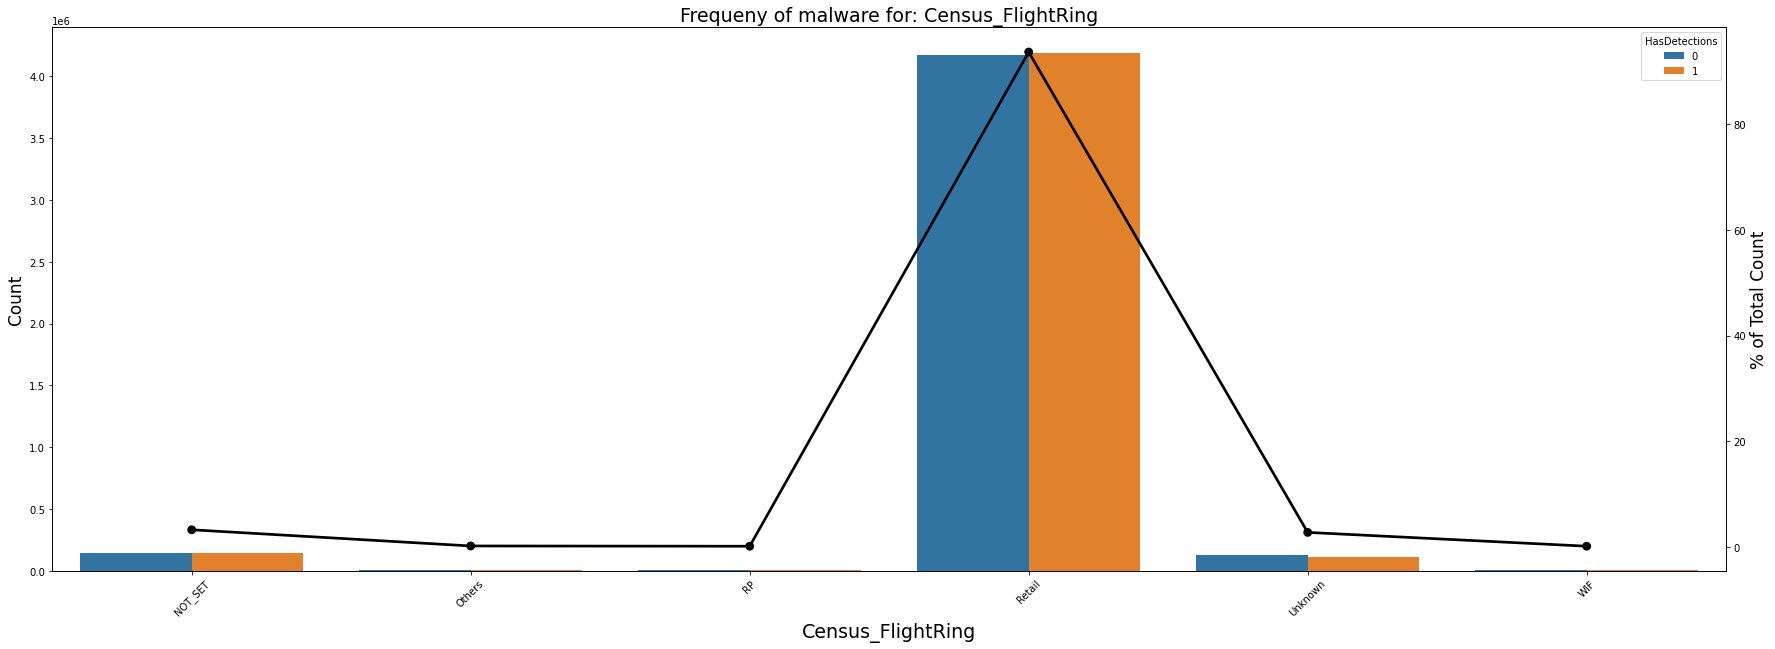

In [15]:
columns = ['Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 
           'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 
           'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 
           'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']

for column in columns:
    
    bar_df,line_df = get_top_features_for_category(column,1)
    
    plt.figure(figsize=(30,10))
    
    Bar_Plot = sns.countplot(x=column,hue='HasDetections',data=bar_df,order=line_df[column].tolist())
    Line_Plot = Bar_Plot.twinx()
    Line_Plot = sns.pointplot(x=column, y='Total', data=line_df, color='black', order=line_df[column].tolist(), legend=False)
    
    Bar_Plot.set_title("Frequeny of malware for: " + str(column), fontsize=19)
    
    Bar_Plot.set_xticklabels(Bar_Plot.get_xticklabels(),rotation=45)
    Bar_Plot.set_xlabel(column, fontsize=19)
    Bar_Plot.set_ylabel("Count", fontsize=17)
    Line_Plot.set_ylabel("% of Total Count", fontsize=17)
    
    plt.show()
    
    del Bar_Plot,Line_Plot, bar_df,line_df
    
    

    
del columns



Features with significant malware count

```
1. Census_OSBranch: rs4_release
2. Census_OSInstallTypeName: UUPUPGRADE 
3. Census_OSWUAutoUpdateOptionsName: FullAuto (Fully automatic settings for update could lead to a higher chance of malware)
4. High incidence of malware among desktop and AllInOne among Cenus_MDC2FormFactor
```

## Numerical features

In [16]:
Binary_Features = []
Numerical_Features = []

for col in numeric_columns:
    
    # Remove features due to high number of missing values
    if not col in ['DefaultBrowsersIdentifier','PuaMode','Census_ProcessorClass']:
        
        
        
        if df[col].nunique() == 2:
            Binary_Features.append(col)
            
        else:
            Numerical_Features.append(col)
            


- Bar plots for categorical features

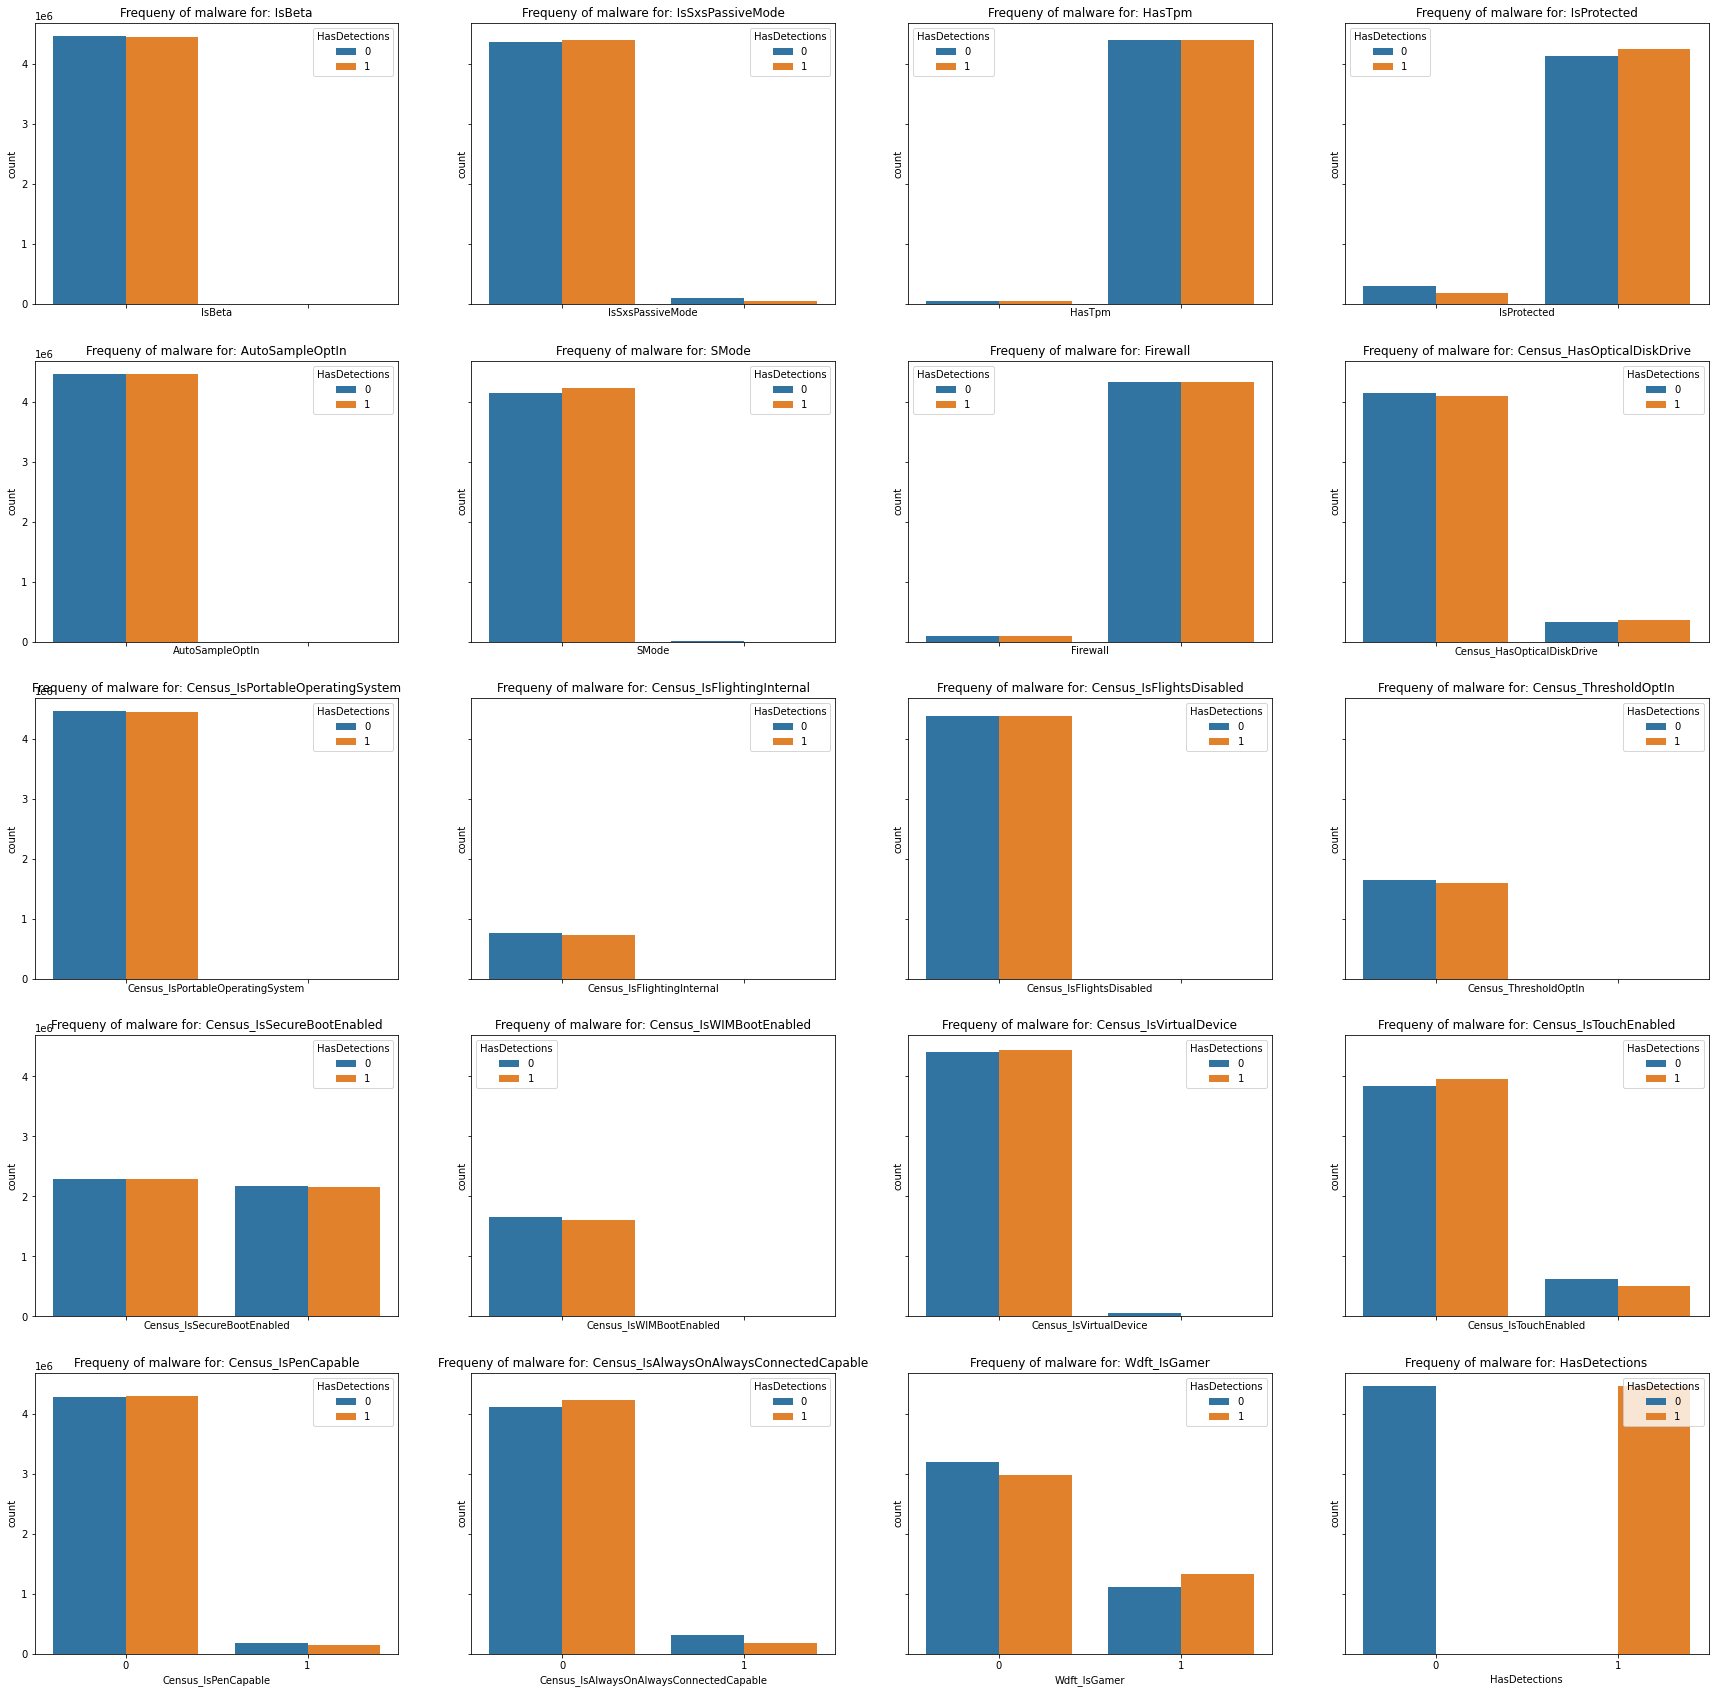

In [17]:
fig, axs = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(30,30))

count_row = 0
count_columns = 0
for column in Binary_Features:    
    
    
    Bar_Plot = sns.countplot(x=column,hue='HasDetections',data=df,ax = axs[count_row][count_columns]).set_title("Frequeny of malware for: " + str(column))
        
   
    count_columns +=1
    
    if count_columns == 4:
        count_row+=1
        count_columns=0
    
   
    
plt.show()

del Bar_Plot,count_columns,count_row,Binary_Features,numeric_columns

Interesting observations

```
1. Most systems have an antivirus system installed (isProtected). But they also have a slightly higher malware count compared to systems without antivirus installed.
2. Low chance of malware when microsoft store apps are only installed. (SMode)
3. Gaming device seems to a higher count of malware compared to non gaming systems

```


In [18]:
print(Numerical_Features)

['RtpStateBitfield', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IeVerIdentifier', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Wdft_RegionIdentifier']


In [19]:
for feature in Numerical_Features:
    
    print(feature)
    print(np.var(df[feature]))

RtpStateBitfield
0.0
AVProductStatesIdentifier
190438352.0
AVProductsInstalled
0.0
AVProductsEnabled
0.0
CountryIdentifier
3974.9313284655136
CityIdentifier
2375062016.0
OrganizationIdentifier
0.0
GeoNameIdentifier
nan
LocaleEnglishNameIdentifier
4304.397580610976
OsBuild
4799100.785592078
OsSuite
61545.990830125214
IeVerIdentifier
nan
UacLuaenable
97372760.0
Census_OEMNameIdentifier
nan
Census_OEMModelIdentifier
5110027776.0
Census_ProcessorCoreCount
0.0
Census_ProcessorManufacturerIdentifier
0.0
Census_ProcessorModelIdentifier
nan
Census_PrimaryDiskTotalCapacity
1.981703682810446e+19
Census_SystemVolumeTotalCapacity
104562614272.0
Census_TotalPhysicalRAM
24712310.0
Census_InternalPrimaryDiagonalDisplaySizeInInches
0.0
Census_InternalPrimaryDisplayResolutionHorizontal
nan
Census_InternalPrimaryDisplayResolutionVertical
nan
Census_InternalBatteryNumberOfCharges
3.737666633322201e+18
Census_OSBuildNumber
3848434.8732333556
Census_OSBuildRevision
8596452.401608523
Census_OSInstallLanguag

In [20]:
print(df[feature])

0          10.0
1           8.0
2           3.0
3           3.0
4           1.0
           ... 
8921478     5.0
8921479     5.0
8921480     7.0
8921481    13.0
8921482    11.0
Name: Wdft_RegionIdentifier, Length: 8921483, dtype: float16


- To be updated.